# Начало <a id='intro'></a>
Интернет-магазин, который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
___
# Start 
Online store, which sells computer games all over the world. Historical data on game sales, user and expert ratings, genres and platforms (for example, Xbox or PlayStation) are available from open sources. You need to identify the patterns that determine the success of the game. This will allow you to bet on a potentially popular product and plan advertising campaigns.

[Предобработка данных](#intro_1)

[Исследовательский анализ данных](#intro_2) 

[Портрет пользователя каждого региона](#intro_3)

[Проверка гипотез](#intro_4)

[ОБЩИЙ ВЫВОД](#intro_5)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/datasets/games.csv')
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


* Имеются пропущенные значения в 3 колонках:

`Critic_Score, User_Score, Rating`

* формат даты-времени в столбце `Year_of_Release` необходимо причести в "читаемый" вид

* обнаруженные NaN необходимо будет заполнить значениями (средними или медианными), а также проверить данные на "аномальность" с последующим их удалением если такие возникнут.
___
* There are missing values in 3 columns:
`Critic_Score, User_Score, Rating`
* the date-time format in the `Year_of_Release` column must be converted to a "readable" form
* the detected NaN will need to be filled in with values (average or median), as well as check the data for "anomaly" and then delete them if such occur.

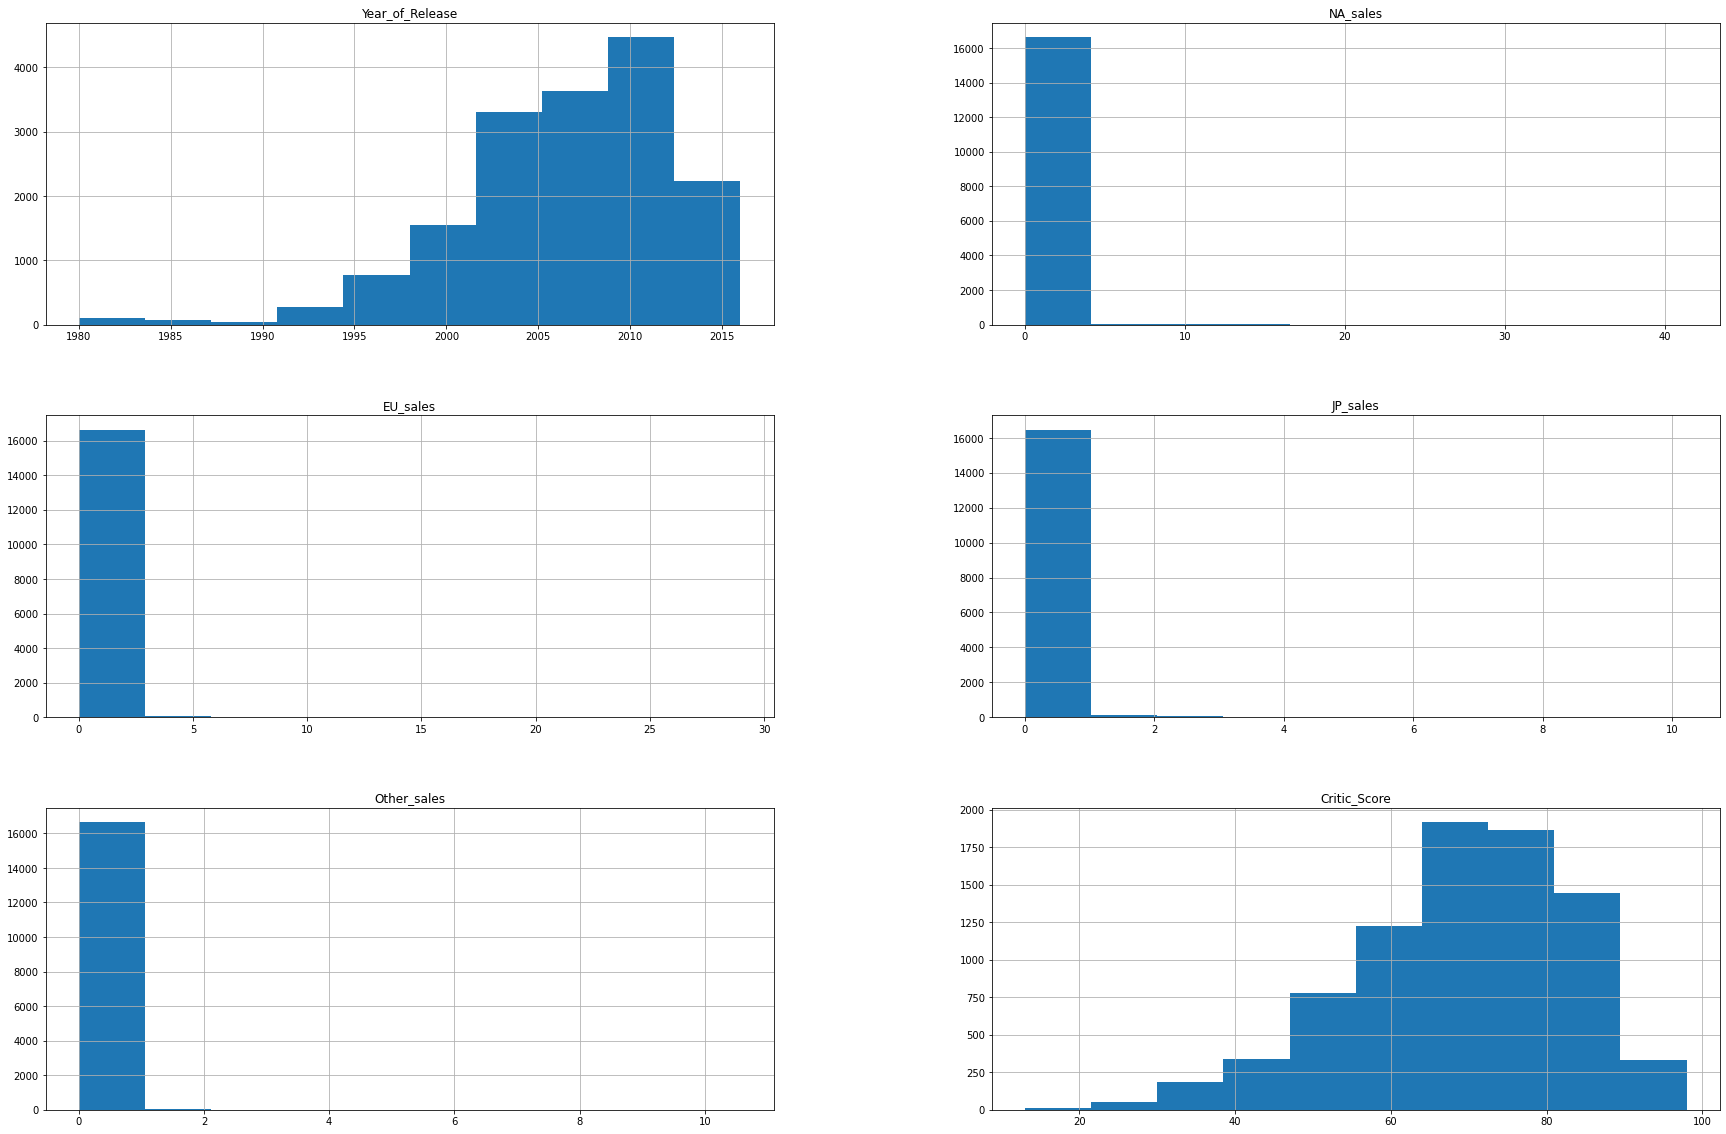

In [3]:
df.hist(figsize=(30,20));

Так, исходя из открытых данных мы видим, что максимолько количество игр было выпущено примерно в 2009-2012 годах.
Имеется много нулевых значений по продажам во всех исследуемых зонах (Америка, Европа,Япония) и соответственно в других зонах.
Чаще всего оценка критиков не превышает 70 балов.
___
So, based on open data, we see that the maximum number of games was released around 2009-2012.
There are many zero values for sales in all the studied zones (America, Europe, Japan) and, accordingly, in other zones.
Most often, the critics' score does not exceed 70 points.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
#проверим на всякий случай наличие дубликатов
df.duplicated().sum()

0

In [6]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [7]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


# Вывод

Датафрейм состоит из 16715 строк и 11 столбцов. Имеются пропущенные значения NaN, которые необходимо обработать. Например, какие-то пропущенные значение заменим сразу, какие-то оставим впоть перед построением графиков.

Также необходимо выяснить, каким образом заполнить пропущенные значения (средней или медианой), а также определить выбросы, например, интересно какая игра получила максимальную оценку критиков по столбцу `Critic_score`. 

Столбцы `Year_of_Release`, `Critic_Score` и `User_Score` - нужно будет переименовать в корректный вид, иначе сложно будет произвести расчеты по ним.

Заодно будет лучшим решением указать более наглядный формат даты в столбце `Year_of_release` с изменением типа данных.

Также, столбцам `User_Score` и `Rating` необходимо изменить типы данных, поскольку как правило рейтинг обозначается десятичной дробью или, в крайнем случае, в процентном соотношении.

Однозначно необходима предобработка данных, так как наблюдаются нетипичные данные с подозрительно низкими и высокими показателями, что не позволят ответить на главные вопросы исследования и сформировать корректные выводы.
___
# Conclusion

The dataframe consists of 16715 rows and 11 columns. There are missing NaN values that need to be processed. For example, some missing values will be replaced immediately, some will be left in place before plotting.

It is also necessary to find out how to fill in the missing values (average or median), as well as determine outliers, for example, I wonder which game received the maximum critical rating in the `Critic_score` column. 

The columns will need to be renamed to the correct form, otherwise it will be difficult to make calculations on them.

At the same time, it would be a better solution to specify a more visual date format in the `Year_of_release` column with a change in the data type.

Also, the columns need to change the data types, because as a rule, the rating is indicated by a decimal fraction or, at least, as a percentage.

Data preprocessing is definitely necessary, since atypical data with suspiciously low and high indicators are observed, which will not allow answering the main questions of the study and forming correct conclusions.

# Предобработка данных <a id='intro_1'></a>
___
# Data preprocessing

In [8]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [9]:
#определяем сумму пропусков по тем столбцам, где они имеются
#determine the sum of omissions by those columns where they are available
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [10]:
#определяем долю пропусков по тем столбцам, где они имеются
#we determine the proportion of omissions by those columns where they are available
df.isna().mean()*100

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64

In [11]:
df['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

Строки с пропусками по годам имеют другую полезную информацию, например название, жанр и значения по продажам, лучше заменить эти пропуски на нулевые значения

In [12]:
#Пока заменяем пропущенные значения по колонке 'year_of_release' на 0, 
#принимаем во внимание, что данные можно заполнить фактическими по названию (если это не трудоемко)
#While replacing the missing values in the 'year_of_release' column with 0, 
#we take into account that the data can be filled in with actual ones by name (if it is not time-consuming)
df['year_of_release'] = df['year_of_release'].fillna(0).astype(int)
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [13]:
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [14]:
#Находим строки с пропусками в имени 
df.loc[df['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [15]:
df.dropna(subset = ['name', 'genre'], inplace=True)

Строки с пропусками в имени - это те же 2 строки с пропусками по жанру (колонки `Name` и `Genre`). 

Такие строки крайне бесполезны для анализа по следующим причинам:
* сложно восстановить
* год реализации (1993) практически не влияет на прогноз на 2017 год, так как, как правило для проноза исследуются данные до 3-х лет, как минимум на основе предыдущегоБ в нашем случае - 2016 года.

В связи с этим, принимаем решения удалить эти строки.

Даже тот факт, что они являются частью общей статистики за весь период - не несет существенной пользы для прогнозируемого 2017 года.

Необходимо подробнее изучить пропуски в колонках `Critic_Score`, `User_Score` и `Rating` с более 6000 пропусков.
___
The lines with omissions in the name are the same 2 lines with omissions by genre (columns `Name` and `Genre'). 

Such strings are extremely useless for analysis for the following reasons:
* it is difficult to restore
* the year of implementation (1993) practically does not affect the forecast for 2017, since, as a rule, data up to 3 years are studied for prognosis, at least on the basis of the previous one, in our case, 2016.

In this regard, we decide to delete these lines.

Even the fact that they are part of the general statistics for the entire period does not bring significant benefits for the projected 2017.

It is necessary to study in more detail the omissions in the columns `Critic_Score`, `User_Score` and `Rating` with more than 6000 omissions.

In [16]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [17]:
#смотрим характеристики, дающие представление о выборке
#looking at the characteristics that give an idea of the sample
df['critic_score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

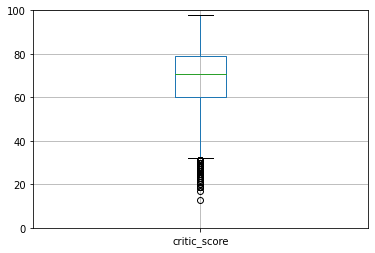

In [18]:
#df.plot(x='critic_score', kind='scatter');
df.boxplot('critic_score')
plt.ylim(0, 100);

Медианное значение расположено в районе 70-75 процентов. Видимо большинство игр не такие уж плохие.

Имеются выбросы с оценками до 30%. Максимальная оценка - 98. Необходимо выяснить жанр и ингровую платформу таких игр.
___
The median value is located around 70-75 percent. Apparently most games are not so bad.

There are emissions with estimates up to 30%. The maximum score is 98. It is necessary to find out the genre and genre platform of such games.

In [19]:
df[df['critic_score'] >= 98]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
51,Grand Theft Auto IV,X360,2008,Action,6.76,3.07,0.14,1.03,98.0,7.9,M
57,Grand Theft Auto IV,PS3,2008,Action,4.76,3.69,0.44,1.61,98.0,7.5,M
227,Tony Hawk's Pro Skater 2,PS,2000,Sports,3.05,1.41,0.02,0.20,98.0,7.7,T
5350,SoulCalibur,DC,1999,Fighting,0.00,0.00,0.34,0.00,98.0,8.8,T


2 одинаковые игры с названием "Grand Theft Auto IV" на разных платформах X360 и PS3
Но это для нас не имеет никакого значения для прогноза 2017 года как и оценка выше 98 баллов, поскольку, как мы видим после 2008 года такую высокую оценку игры уже не получали.
___
2 identical games with the name "Grand Theft Auto IV" on different platforms X360 and PS3
But this does not matter to us for the forecast of 2017, as well as the score above 98 points, because, as we see, after 2008, the games have not received such a high rating.

In [20]:
df[df['critic_score'] == 97]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M
38,Grand Theft Auto III,PS2,2001,Action,6.99,4.51,0.30,1.30,97.0,8.5,M
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M
49,Super Mario Galaxy,Wii,2007,Platform,6.06,3.35,1.20,0.74,97.0,8.9,E
97,Super Mario Galaxy 2,Wii,2010,Platform,3.56,2.35,0.98,0.62,97.0,9.1,E
129,Halo: Combat Evolved,XB,2001,Shooter,4.98,1.30,0.08,0.07,97.0,8.6,M
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M
249,Tony Hawk's Pro Skater 3,PS2,2001,Sports,2.66,1.29,0.01,0.46,97.0,7.5,T
517,Metroid Prime,GC,2002,Shooter,1.96,0.67,0.10,0.09,97.0,9.3,T


97 баллов от критиков - это очень даже неплохо, особенно если такие оценки были относительно недавно и попадают в анализируемый период для прогноза на 2017 год, а именно в 2014 году за игру _Grand Theft Auto V_, реализуемую на платформах PS4 и XOne.
Примечательно, что данная игра "держит марку" и является продолжением игры "Grand Theft Auto IV" жанр которой - Action.
Здорово, что все еще выпускаются игры с таким высоким одобрением от критиков.
___
97 points from critics is very good, especially if such estimates were relatively recent and fall into the analyzed period for the forecast for 2017, namely in 2014 for the game _Grand Theft Auto V_, implemented on the PS4 and XOne platforms.
It is noteworthy that this game "holds the brand" and is a continuation of the game "Grand Theft Auto IV", the genre of which is Action.
It's great that games are still being released with such high critical acclaim.

In [21]:
df[df['critic_score'] <= 13]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
13689,Ride to Hell,PS3,2013,Racing,0.02,0.01,0.0,0.01,13.0,1,M


In [22]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Видим значение 'tbd' - акроним служит для отметки неясностей или пропусков, которые надо заполнить.
[ссылка](https://www.mobilradio.ru/information/vocabulary/tbd.htm)
Заменяем на nan. Также изменим тип данных на float, так как оценки пользователей представлены в десятичном виде

In [23]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)
# Функция для замены значения 'tbd' на NaN
#def replace_tbd_user_score(wrong, correct):
#    df['user_score'] = df['user_score'].replace(wrong, correct)
    
#replace_tbd_user_score('tbd', np.nan)

#проверяем уникальные значения в столбце после применения функции
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [24]:
df['user_score'] = df['user_score'].astype('float')
df['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [25]:
df['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

(-2.0, 10.0)

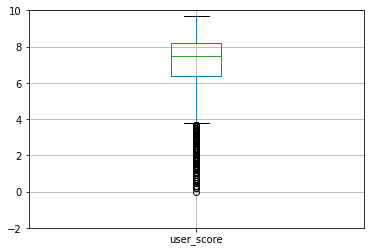

In [26]:
df.boxplot('user_score')
plt.ylim(-2,10)

In [27]:
df['user_score'].describe()

count    7590.000000
mean        7.125046
std         1.500006
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

Медианное значение расположено в районе 7,5. Видимо пользователи в чем-то согласны с критиками.

Имеются выбросы с оценками до 4. Максимальная оценка - выше 9. Необходимо выяснить жанр и ингровую платформу таких игр и сопоставить с результатами критиков.
При этом стандартное отклонение 1,5 говорит о высокой неоднородности в оценках пользователей.
___
The median value is located around 7.5. Apparently, the users agree with the critics in some way.

There are outliers with scores up to 4. The maximum score is above 9. It is necessary to find out the genre and genre platform of such games and compare them with the results of critics.
At the same time, a standard deviation of 1.5 indicates a high heterogeneity in user ratings.

In [28]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [29]:
# Функция для замены в столбце 'rating' значения NaN на 'undefined'
def replace_nan_rating(wrong, correct):
    df['rating'] = df['rating'].replace(wrong, correct)
    
replace_nan_rating(np.nan, 'undefined')

#проверяем уникальные значения в столбце после применения функции
df['rating'].unique()

array(['E', 'undefined', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

# Вывод  

Пока принято нешение не заполнять попуски в колонках `critic_score`, `user_score` поскольку есть большая вероятность получить неточные результаты в статистическом анализе.
___
# Conclusion 
So far, it has been decided not to fill in the releases in the columns `critic_score`, `user_score` because there is a high probability of getting inaccurate results in statistical analysis.

# Исследовательский анализ данных <a id='intro_2'></a>
___
# Research data analysis

In [30]:
#создадим отдельную таблицу для проведения общих расчетов df_other
#посчитаем суммарные продажи во всех регионах
df_other = df
df['sales_game_sum'] =  df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_game_sum
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,undefined,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,undefined,28.31


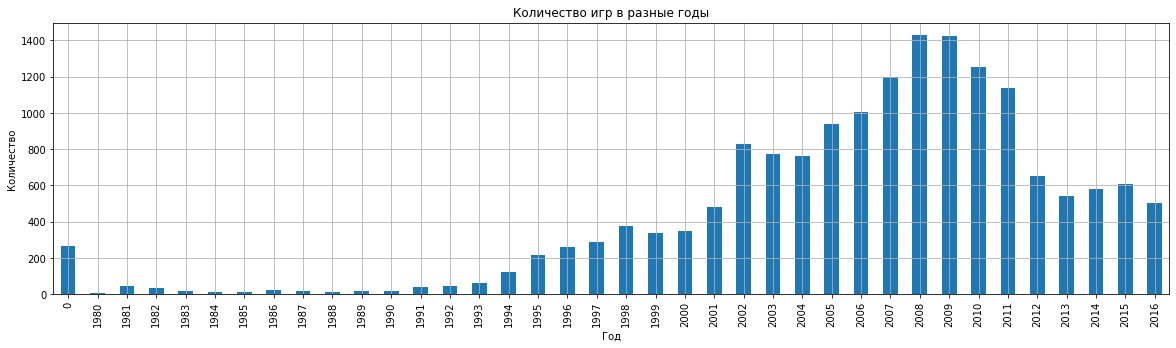

In [31]:
#Посчитаем сколько игр выпускалось в разные годы:
total_games_year = df.groupby('year_of_release')['name'].count()
total_games_year.plot(y='count', kind='bar', figsize=(20,5))
plt.grid(True)
plt.title('Количество игр в разные годы')
plt.xlabel('Год')
plt.ylabel('Количество');


Так с 2009 года наблюдается спад реализаций игр. С 2009 по 2013 год продажи сократились более чем в 2 раза. 

Как отмечалось выше, для прогноза продаж на 2017 год за ретроспективу лучше взять последний полный год (2015), а также  2016 учитывая, что данные по нему могут быть не полные, но содержащие самую свежую информацию.
___
So since 2009, there has been a decline in game implementations. From 2009 to 2013, sales decreased by more than 2 times. 

As noted above, for the sales forecast for 2017, it is better to take the last full year (2015) for a retrospective, as well as 2016, given that the data on it may not be complete, but containing the latest information.

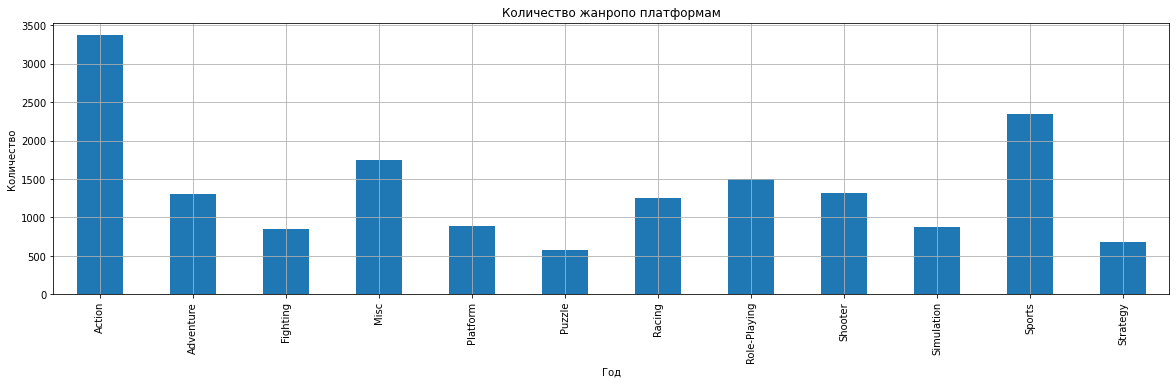

In [32]:
#Посчитаем жанры по платформам:
total_games_genre_platform = df.groupby('genre')['name'].count().plot(y='count', kind='bar', figsize=(20,5))
plt.grid(True)
plt.title('Количество жанропо платформам')
plt.xlabel('Год')
plt.ylabel('Количество');

Тройка лидеров по популярности - Action, Sports, Misc. Если они настолько популярны - значит они самые продаваемые.
___

The top three in popularity are Action, Sports, Misc. If they are so popular, then they are the best-selling.

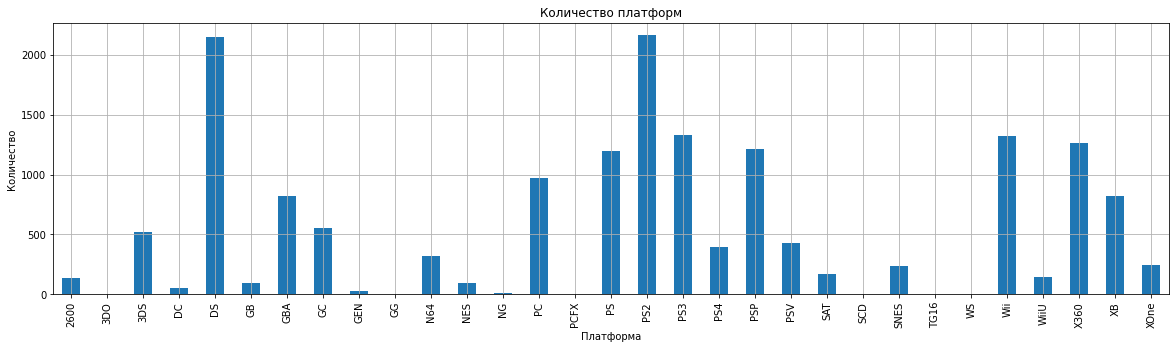

In [33]:
#Посчитаем платформы:
total_platform = df.groupby('platform')['name'].count().plot(y='sales_game_sum', kind='bar', figsize=(20,5))
plt.grid(True)
plt.title('Количество платформ')
plt.xlabel('Платформа')
plt.ylabel('Количество');

Лидеры по популярности за весь период - платформы DS и PS2.

В то время как GG, PCFX, TG16 - самые непопулярные.

Однако важно заметить, что многие платформы перестали существовать в связи со спадом интереса в целом по отрасли. В связи с этим, необходимо опеределить "лидеров" на последних годах, например с 2013 года. Таким образом мы сможем посмотреть тенденцию действующих платформ за таой период и не исключим тенденцию по отношению к другим платформам (развивающимся или угасающимся).
___
The leaders in popularity for the entire period are the DS and PS2 platforms.

While GG, PCFX, TG16 are the most unpopular.

However, it is important to note that many platforms have ceased to exist due to the decline in interest in the industry as a whole. In this regard, it is necessary to identify the "leaders" in recent years, for example, since 2013. Thus, we will be able to see the trend of existing platforms over the same period and will not exclude the trend in relation to other platforms (developing or fading).

Смотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.
___
We look at how sales by platform have changed. Let's choose the platforms with the highest total sales and build a distribution by year.

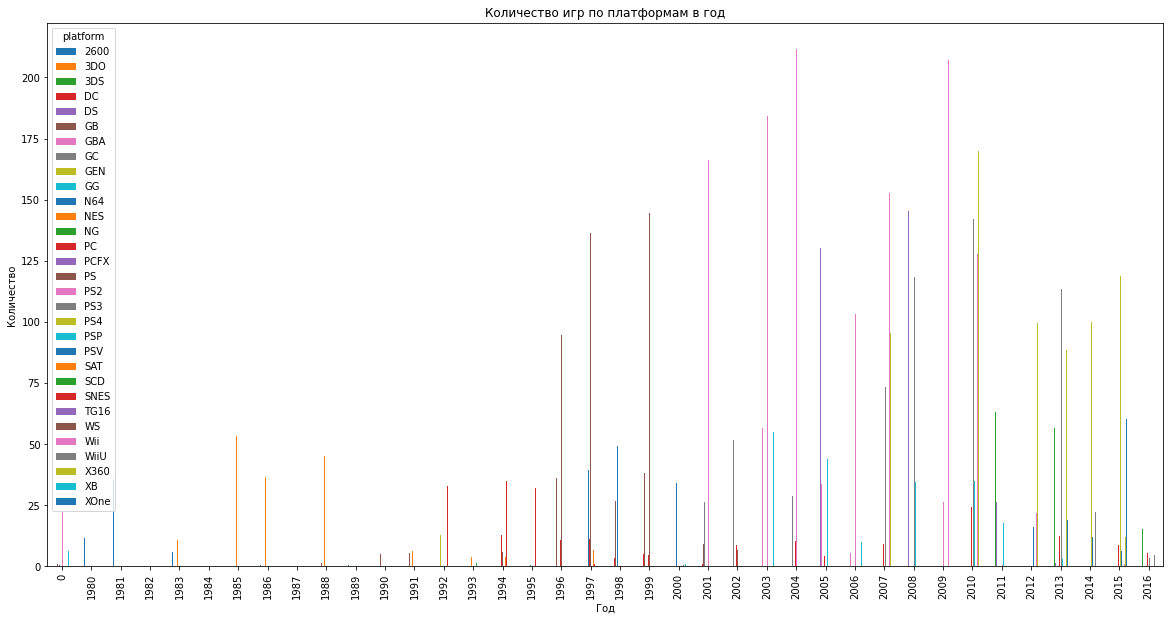

In [34]:
#Посчитаем сколько игр выпускалось в разные годы по платформам:
#total_games_year_platform = df.pivot_table(index='name', values=['year_of_release', 'platform']).count()

total_games_year_platform = df.pivot_table(index='year_of_release', columns = 'platform', values='sales_game_sum', aggfunc='sum')
total_games_year_platform.plot(kind='bar',figsize=(20,10))
plt.title('Количество игр по платформам в год')
plt.xlabel('Год')
plt.ylabel('Количество');

На графике можем видеть, что по каждому году агрегировались платформы с продажами.
Посмотрим какие платформы оказались актуальными с 2012 года.
___
On the graph, we can see that platforms with sales were aggregated for each year.
Let's see which platforms have been relevant since 2012.

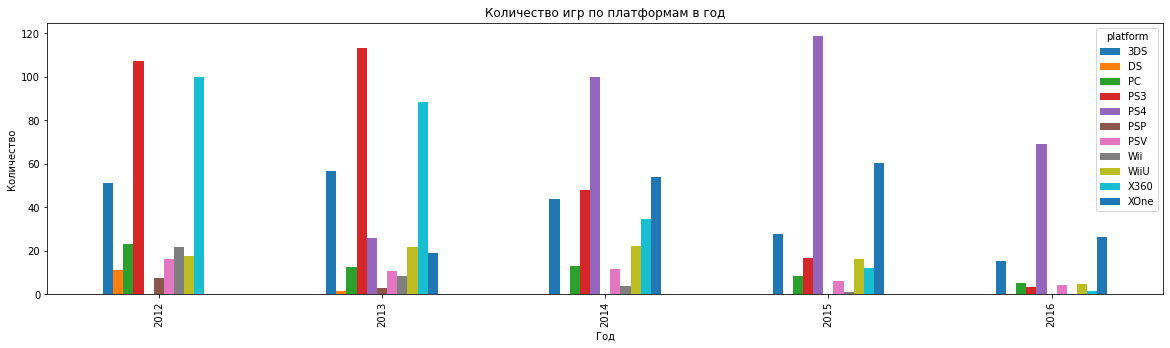

In [35]:
#Посмотрим на историю платформ и выделим перспективные 
df1 = df.query('2012 <= year_of_release <= 2016')
total_games_year_platform_set = df1.pivot_table(index='year_of_release', columns = 'platform', values='sales_game_sum', aggfunc='sum')
#total_games_year_platform
total_games_year_platform_set.plot(kind='bar', figsize=(20,5))
plt.title('Количество игр по платформам в год')
plt.xlabel('Год')
plt.ylabel('Количество');

Так, мы видим наибольшее количество продаж в 2016, 2015 году и по платформе **PS4**, которая появилась в 2013 году и также лидировала по продажам в 2014 году.

Платформа **XOne**, также появившаяся в 2013 году наращивала продажи и в 2014-2016 занимает лидирующее второе место

Замыкает тройку лидеров платформа **3DS**, которая тем не менее демонстрирует активное снижение продаж с 2013 года.

Платформа **PS3** занимавшая абсолютное лидерство в 2012-2013 гг. к 2016 году снизила свои продажи практически примерно в 4,5 раза.

Платформы DS, PSP не заявляют о себе с 2014 года, вероятно они ушли с рынка.

Остальные платформы за этот период не демонстрируют каких-либо впечатляющих продаж на общем фоне спада продаж по идустрии.

Примерно за 2 года некоторые платформы изживают себя и уходят с рынка, новые появляются примерно раз в 4 года.

Так, для последующего анализа выделим следующие 8 платформ, первые три из которых будут потенциально прибыльными:
* **PS4**
* **XOne**
* **3DS**
* **PS3**
* **WiiU**
* **PS**
* **PSV**
* **X360**
___
So, we see the largest number of sales in 2016, 2015 and on the **PS4** platform, which appeared in 2013 and also led in sales in 2014.

The **XOne** platform, which also appeared in 2013, increased sales and in 2014-2016 occupies the leading second place

The **3DS** platform closes the top three, which nevertheless demonstrates an active decline in sales since 2013.

The **PS3** platform, which held absolute leadership in 2012-2013, by 2016 had reduced its sales by almost 4.5 times.

DS, PSP platforms have not declared themselves since 2014, they probably left the market.

The rest of the platforms during this period do not show any impressive sales against the general background of a decline in sales in the industry.

In about 2 years, some platforms become obsolete and leave the market, new ones appear about once every 4 years.

So, for further analysis, we will highlight the following 8 platforms, the first three of which will be potentially profitable:
* **PS4**
* **XOne**
* **3DS**
* **PS3**
* **WiiU**
* **PS**
* **PSV**
* **X360**

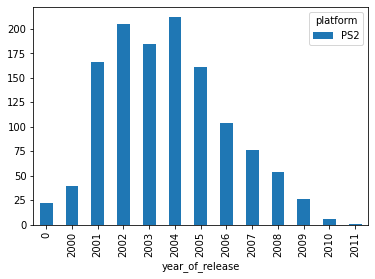

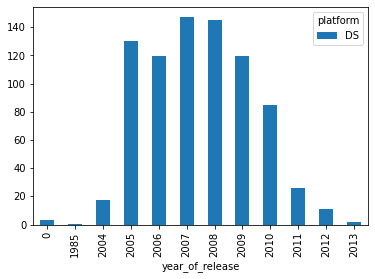

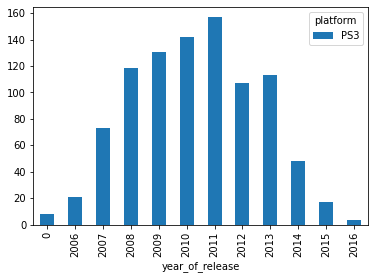

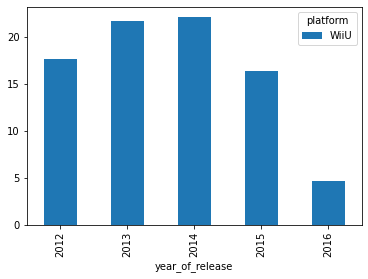

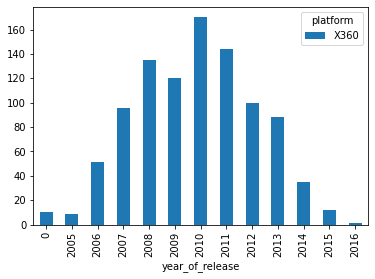

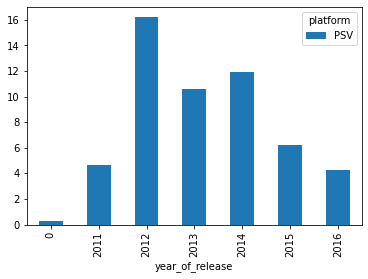

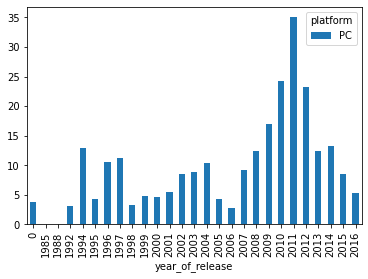

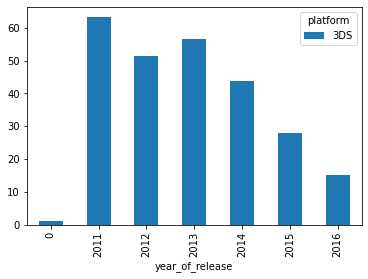

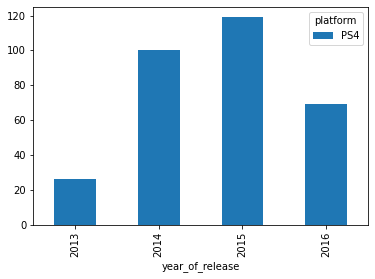

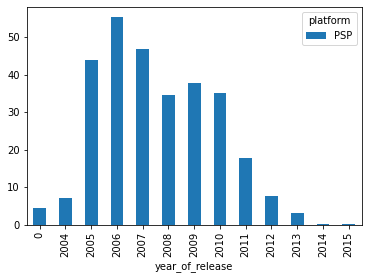

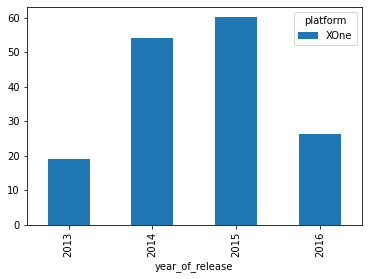

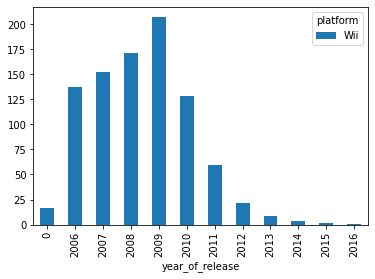

In [36]:
top_platforms = ['PS2', 'DS', 'PS3', 'WiiU', 'X360', 'PSV', 'PC', '3DS', 'PS4', 'PSP', 'XOne', 'Wii']

for p in top_platforms:
    (df[df['platform'] == p]
     .pivot_table(index='year_of_release', columns='platform', values='sales_game_sum', aggfunc='sum')
     .plot(kind='bar'))

В основном, уже на 2 год у платформ возрастают продажи и подъем до "пикового значения" занимает от года до 6 лет.
"Пиковое значение" у всех топовых платформ держится всего 1 год.

Раз в год лидирующее значение занимает какая-либо из платформ, за исключением 2011 когда максимум по продажам имели платформы 'PS3' и '3DS' и 2015 года, где лидерами были XOne и PS4.
___
Basically, sales have been increasing for the platforms for 2 years already, and it takes from a year to 6 years to rise to the "peak value".
The "peak value" of all top platforms lasts only 1 year.

Once a year, one of the platforms takes the leading role, with the exception of 2011, when the PS3 and 3DS platforms had the highest sales and 2015, where the leaders were XOne and PS4.

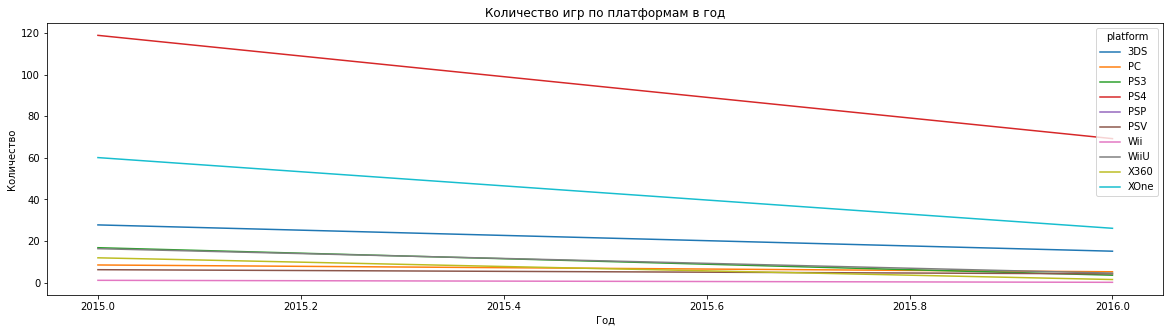

In [37]:
df1 = df.query('2015 <= year_of_release <= 2016')
total_games_year_platform_set = df1.pivot_table(index='year_of_release', columns = 'platform', values='sales_game_sum', aggfunc='sum')
#total_games_year_platform
total_games_year_platform_set.plot(figsize=(20,5))
plt.title('Количество игр по платформам в год')
plt.xlabel('Год')
plt.ylabel('Количество');

Наблюдается "пакетное" угасание активности платформ вплоть до нуля на протяжении нескольких лет. Видимо это связано со снижением интереса ЦА на фоне переключения интересов на какие-либо другие технологичные продукты, моды и т.п.

Для целей прогнозирования продаж на следующий год даже в традиционных бизнесах редко берут данные более чем за 2-3 года. А в такой динамично меняющейся индустрии, как компьютерные игры и вовсе не стоит брать слишком большой временной интервал - иначе обязательно войдут в анализ уже отжившие тренды. Но и слишком короткий период тоже брать не стоит, так как он не отразит полную картину.
___

There has been a "batch" decline in the activity of platforms down to zero for several years. Apparently, this is due to a decrease in the interest of the target audience against the background of switching interests to any other technological products, mods, etc.

For the purposes of forecasting sales for the next year, even in traditional businesses, they rarely take data for more than 2-3 years. And in such a dynamically changing industry as computer games, you should not take too long a time interval at all - otherwise, outdated trends will definitely be included in the analysis. But it is also not worth taking too short a period, since it will not reflect the full picture.

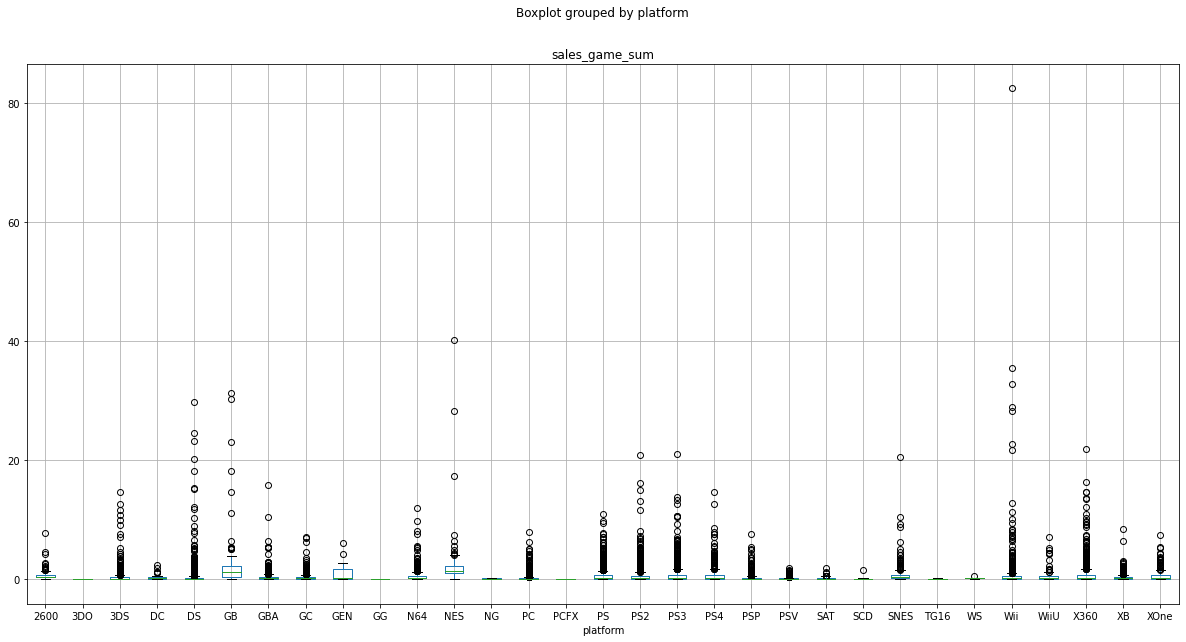

In [38]:
#построим график усов по платформам за весь период
df.boxplot(column='sales_game_sum', by='platform', figsize=(20,10));

Наблюдаем платформы которые имеют нулевые значения, а также выбросы и выбивающиеся значения. Учитывая, что выбивающими значениями могут быть редкие продажи в больших объемах (например больше 80 млн.), то не стоит как-то обрабатывать эти данные, тем боллее это статистика за весь период.
___
We observe platforms that have zero values, as well as outliers and outliers. Given that the knockout values may be rare sales in large volumes (for example, more than 80 million), then it is not necessary to somehow process this data, the more it is statistics for the entire period.

In [39]:
#Обновим дата-фрейм с учетом топ-з платформ и оставим только их
df = df.query("platform == ['PS4', 'XOne', '3DS']")
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_game_sum
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,undefined,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,undefined,14.60
40,Mario Kart 7,3DS,2011,Racing,5.03,4.02,2.69,0.91,85.0,8.2,E,12.65
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,undefined,11.68
...,...,...,...,...,...,...,...,...,...,...,...,...
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.7,undefined,0.01
16668,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014,Action,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01
16672,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.00,NaN,NaN,M,0.01
16677,Aikatsu Stars! My Special Appeal,3DS,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01


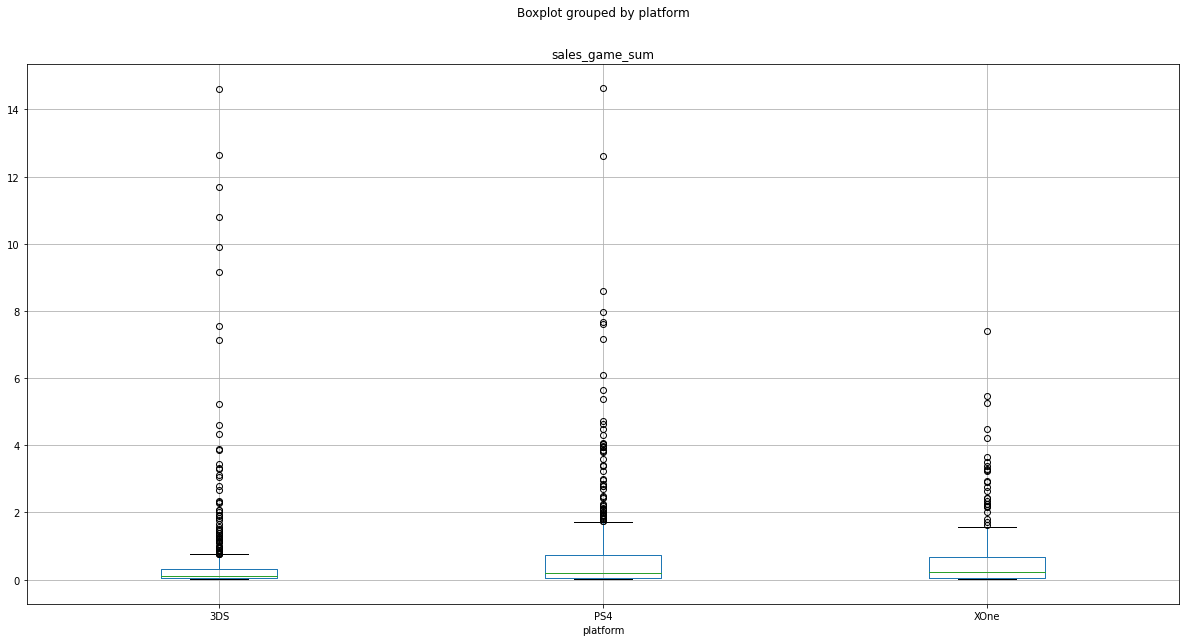

In [40]:
#построим график разброса по топ-трем платформам
df.boxplot(column='sales_game_sum', by='platform', figsize=(20,10));

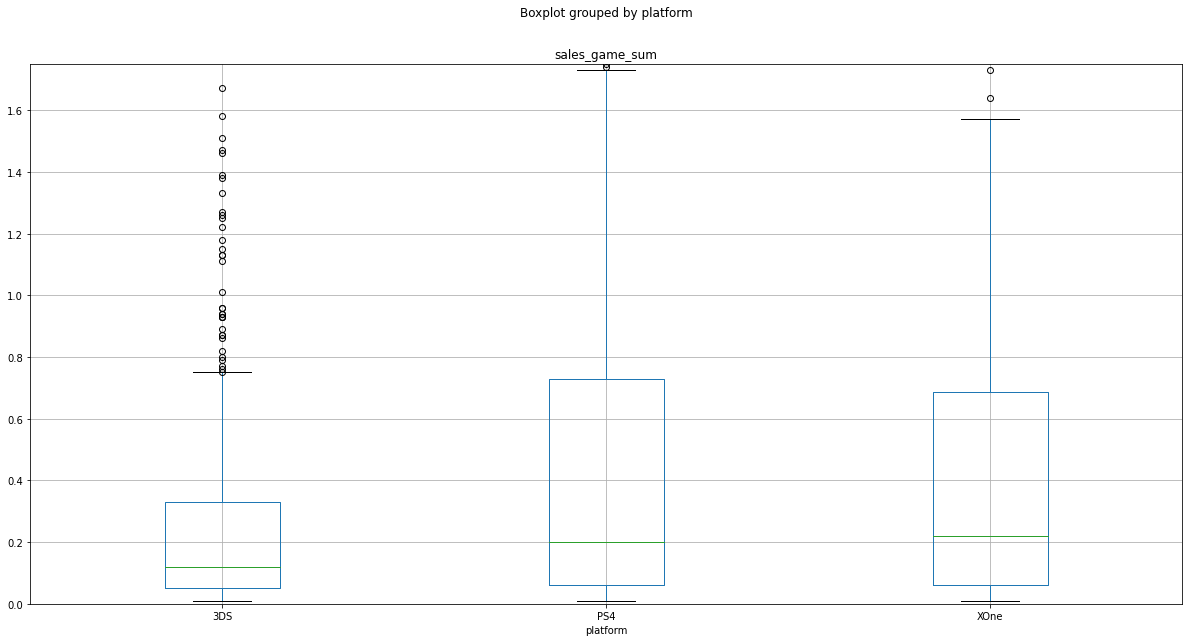

In [41]:
#увеличим масштаб
df.boxplot(column='sales_game_sum', by='platform', figsize=(20,10))
plt.ylim(0, 1.75);

In [42]:
df.groupby('platform')['sales_game_sum'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,520.0,0.498077,1.430876,0.01,0.05,0.12,0.330,14.60
PS4,392.0,0.801378,1.609456,0.01,0.06,0.20,0.730,14.63
XOne,247.0,0.645020,1.036139,0.01,0.06,0.22,0.685,7.39


Также наблюдаем частые и редкие выбросы, которые нет смысла удалять, поскольку это продажи, однако выше всего 3-квантиль расположен у платформы PS4, что коворит о более большем уровне объемах продаж.
При этом, медианное значение у платформы XOne немного больше, чем у PS4, что говорит о стабильном уровне продаж за исследуемый период.
В любом случае, наиболее привлекательная платворма - PS4 так не смотря на меньший уровень "стабольности" она имеет больший объем продаж, а также плотно размещенные частые выбросы в пределах 1,5% от 3-го квантиля.  
___
We also observe frequent and rare outliers, which it makes no sense to remove, since these are sales, but the highest 3-quantile is located at the PS4 platform, which indicates a higher level of sales volumes.
At the same time, the median value of the XOne platform is slightly higher than that of the PS4, which indicates a stable level of sales for the period under study.
In any case, the most attractive platform is the PS4, so despite the lower level of "stability", it has a larger sales volume, as well as densely placed frequent emissions within 1.5% of the 3rd quantile.

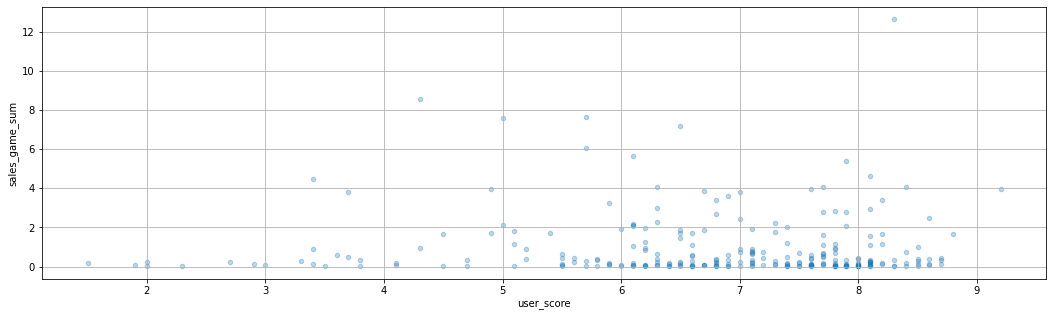

In [43]:
#Построим график рассеяния по срезу самой популярной платформе PS4 в соответствии с объемами продаж
#чтобы gосмотреть как влияют на продажи внутри одной популярной платформы отзывы пользователей.
df[df['platform'] == 'PS4'].plot(x = 'user_score', y = 'sales_game_sum', kind='scatter', grid=True, alpha=0.3, figsize=(18,5));


Чем выше оценка пользователей - от 6, тем мы наблюдаем наиболее частые о более плотно располагающиеся точки - продажи.
Посмотрим на взаимосвязь оценок критиков.
___
The higher the user rating - from 6, the more frequent and more densely located points of sale we observe.
Let's look at the relationship of critics' ratings.

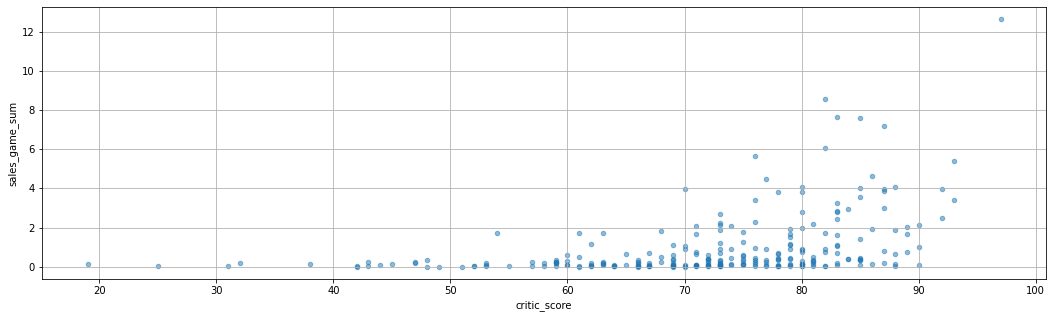

In [44]:
df[df['platform'] == 'PS4'].plot(x = 'critic_score', y = 'sales_game_sum', kind='scatter', grid=True, alpha=0.5, figsize=(18, 5));

Аналогично оценкам пользователей - чем выше оценка критиков - тем выше объемы продаж.
При этом объем продаж больше чувствителен к оценкам критиков, чем к оценкам пользователей, поскольку большая скученность точек-продаж наблюдается после 70, в то время как у пользователей - после 6.
Если оценка критиков меньше 60 - то продажи совсем незначительны.
___
Similarly to user ratings, the higher the critics' rating, the higher the sales volumes.
At the same time, the volume of sales is more sensitive to critics' estimates than to user estimates, since a large crowding of points of sale is observed after 70, while users have after 6.
If the critics' score is less than 60, then sales are quite insignificant.

In [45]:
#Построим корреляцию по эталонной платформе PS4: объем продаж в зависимости от оценок пользователей
df_liader_platform = df[df['platform'] == 'PS4']
df_liader_platform_corr = df_liader_platform['sales_game_sum'].corr(df_liader_platform['user_score'])
display('Correlation_users {}'.format(df_liader_platform_corr))

'Correlation_users -0.031957110204556376'

In [46]:
#Построим корреляцию по эталонной платформе 3DS: объем продаж в зависимости от оценок пользователей
df_platform_3DS = df[df['platform'] == '3DS']
df_platform_3DS_corr = df_platform_3DS['sales_game_sum'].corr(df_platform_3DS['user_score'])
display('Correlation_users {}'.format(df_platform_3DS_corr))

'Correlation_users 0.22480798039571082'

In [47]:
#Построим корреляцию по эталонной платформе XOne: объем продаж в зависимости от оценок пользователей
df_platform_XOne = df[df['platform'] == 'XOne']
df_platform_XOne_corr = df_platform_XOne['sales_game_sum'].corr(df_platform_XOne['user_score'])
display('Correlation_users {}'.format(df_platform_XOne_corr))

'Correlation_users -0.06892505328279412'

Корреляция объема продаж в зависимости от оценок пользователей - очень мальнькая, взаимосвязь практически не ощутимая.
А по платформам PS4 и XOne еще и слабоотрицательная, которая говорит о том, что при увеличении на единицу оценки пользователя - продажа уменьшается, но незначительно.
___
The correlation of sales volume depending on user ratings is very small, the relationship is almost imperceptible.
And for the PS4 and XOne platforms, it is also weakly negative, which suggests that with an increase in the user's rating by one, the sale decreases, but slightly.

In [48]:
df_platform_3DS = df[df['platform'] == '3DS']
df_platform_3DS_corr = df_platform_3DS['sales_game_sum'].corr(df_platform_3DS['critic_score'])
display('Correlation_critics {}'.format(df_platform_3DS_corr))

'Correlation_critics 0.3494009303924131'

In [49]:
df_platform_XOne = df[df['platform'] == 'XOne']
df_platform_XOne_corr = df_platform_XOne['sales_game_sum'].corr(df_platform_XOne['critic_score'])
display('Correlation_critics {}'.format(df_platform_XOne_corr))

'Correlation_critics 0.41699832800840175'

Корреляция объема продаж по всем трем платформам в зависимости от оценок критиков - слабоположительная говорит о том, что при увеличении на единицу оценки критика - продажа увеличивается, но незначительно.
В целом по графикам мы наблюдали увеличение продаж в зависимости от оцено критиков.
___
The correlation of sales volume across all three platforms depending on critics' ratings is weakly positive, which means that with an increase in the unit of evaluation, criticism - sales increase, but only slightly.
In general, according to the charts, we observed an increase in sales depending on the critics' ratings.

In [50]:
#Посмотрим объем продаж по другим платформам за период 2015-2016 г.
df2 = df1.query('2015 <= year_of_release <= 2016')
df2.groupby('platform')['sales_game_sum'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,132.0,0.325152,0.798620,0.01,0.030,0.090,0.2325,7.14
PC,104.0,0.132404,0.209449,0.01,0.020,0.050,0.1425,1.28
PS3,111.0,0.183964,0.342696,0.01,0.020,0.060,0.1600,2.70
PS4,301.0,0.625083,1.457063,0.01,0.050,0.120,0.4200,14.63
PSP,3.0,0.040000,0.034641,0.02,0.020,0.020,0.0500,0.08
PSV,195.0,0.053846,0.063669,0.01,0.020,0.030,0.0600,0.41
Wii,5.0,0.264000,0.390487,0.01,0.030,0.150,0.1800,0.95
WiiU,42.0,0.498810,0.850240,0.01,0.050,0.215,0.5175,4.44
X360,48.0,0.280833,0.381207,0.01,0.040,0.110,0.3525,1.70


In [51]:
 # заполняем столбцы user_score значением -1 
df2['user_score'] = df2['user_score'].replace(np.nan, -1)
#проверяем количество пропусков после удаления
df2.isna().sum()

name                 0
platform             0
year_of_release      0
genre                0
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score       651
user_score           0
rating               0
sales_game_sum       0
dtype: int64

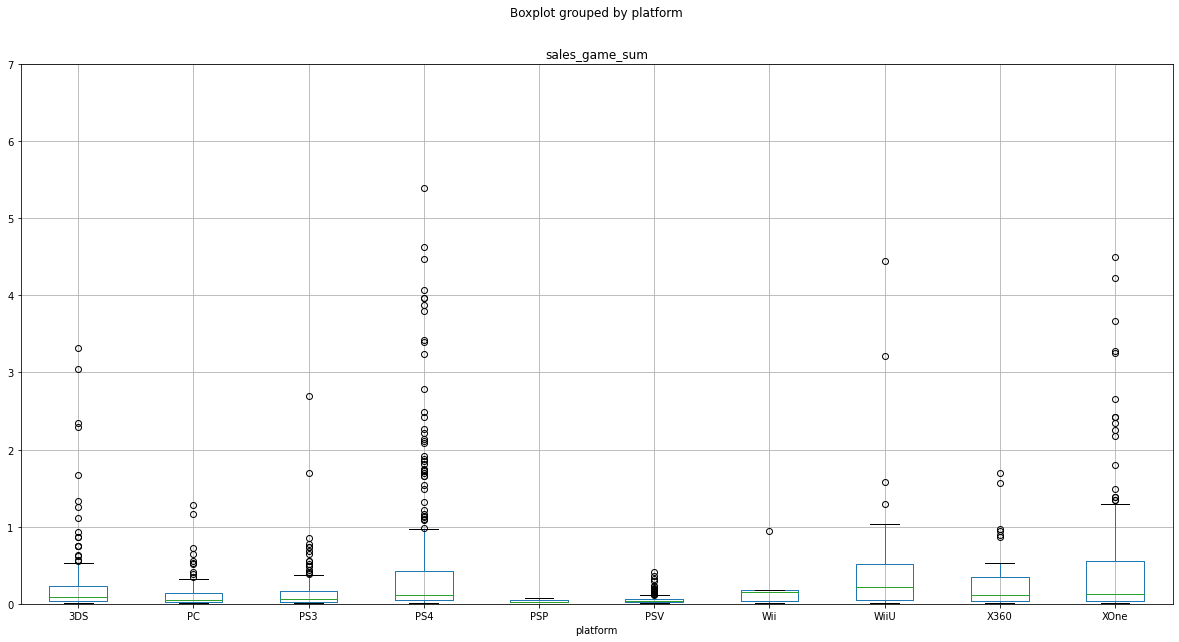

In [52]:
#смотрим диаграмму размаха по всем платформам, но с увеличенным масштабом до 7 млн.)
df2.boxplot(column='sales_game_sum', by='platform', figsize=(20,10))
plt.ylim(0,7);

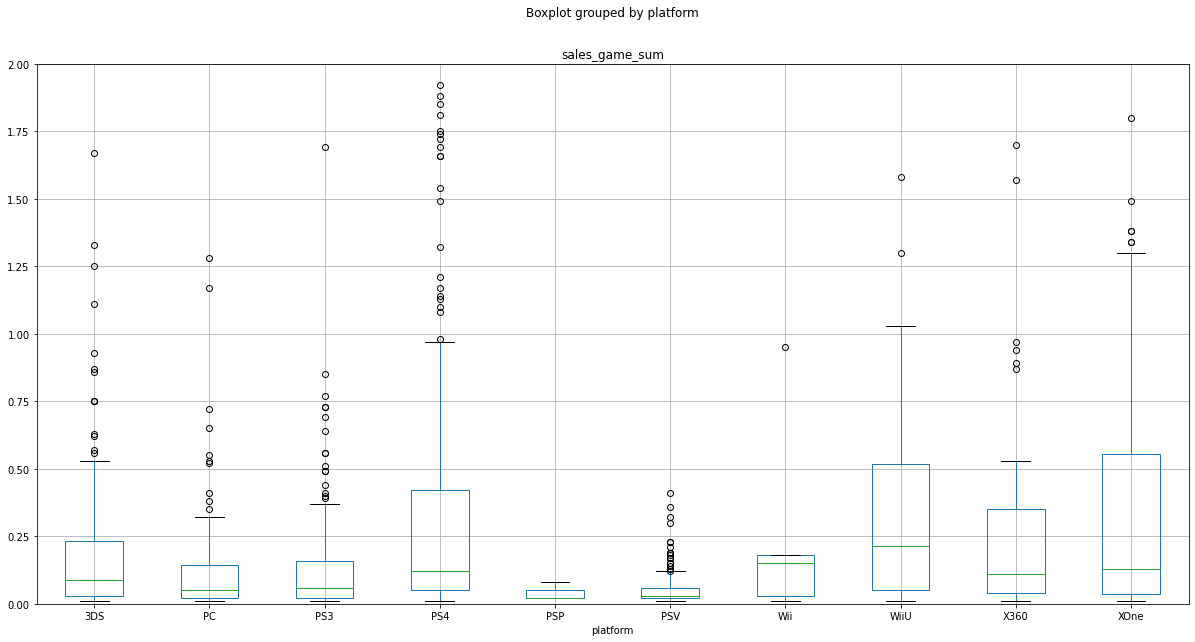

In [53]:
#сужаем диапазон до 2 млн.
df2.boxplot(column='sales_game_sum', by='platform', figsize=(20,10))
plt.ylim(0,2);

Так, помимо "тройки-лидеров" имеются и другие платформы с большим количеством продаж медианное значение которых не превышает 250 тыс. и с большими "усами" - Wii.
Сопоставим наиболее востребованные жанры по платформам
___
So, in addition to the "top three" there are other platforms with a large number of sales, the median value of which does not exceed 250 thousand and with large "mustaches" - Wii.
Let's compare the most popular genres by platforms

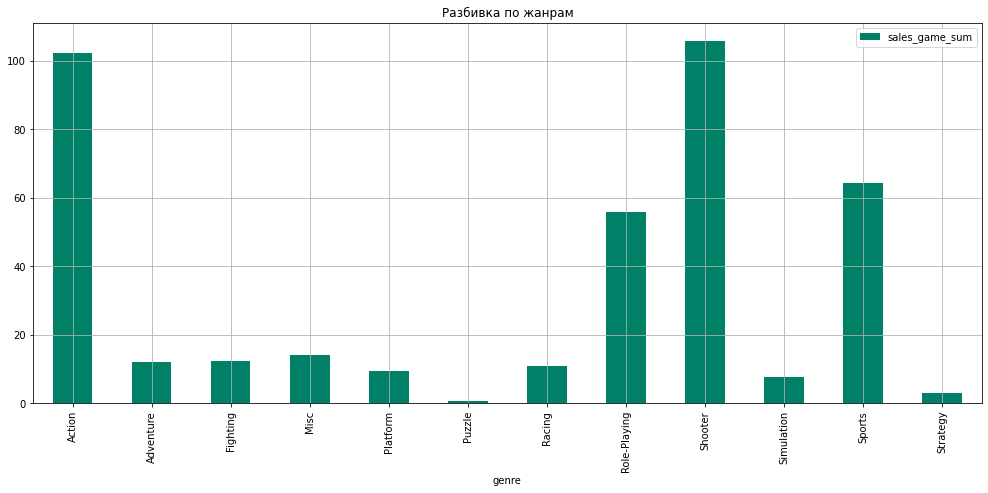

In [54]:
#Определяем востребованность жанров по всем платформам за период 2015-2016гг.

a = df2.pivot_table(index='genre', values='sales_game_sum', aggfunc='sum')

a.plot(kind='bar', legend=True, grid=True, figsize=(17,7), title='Разбивка по жанрам', cmap='summer');

Жанры выделяются с высокими и низкими продажами.
Топ-5 жанров за период 2013-2016гг.:
* Shooter
* Action
* Sports
* Role-Playing
* Misc
___
Genres stand out with high and low sales. Top 5 genres for the period 2013-2016:
* Shooter
* Action
* Sports
* Role-Playing
* Misc

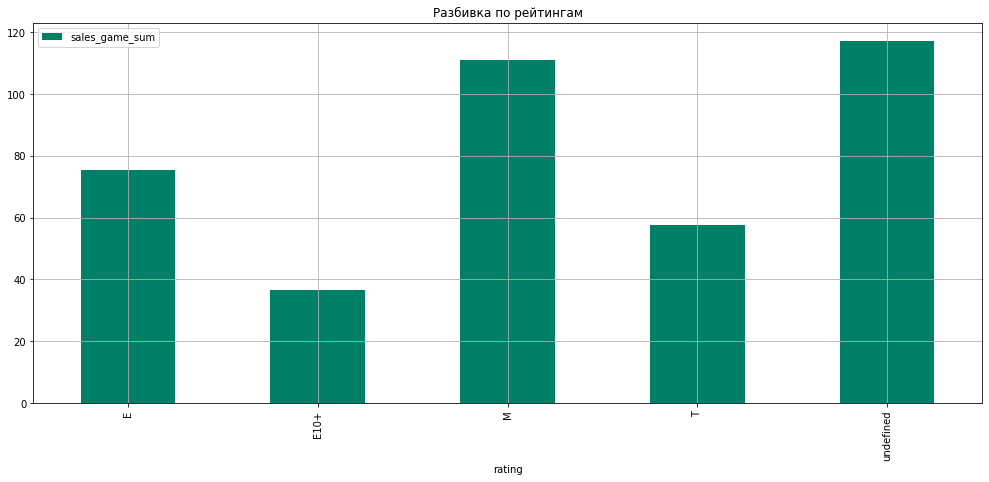

In [55]:
#Определяем топ-5 рейтингов по всем платформам за период 2013-2016гг.

a = df2.pivot_table(index='rating', values='sales_game_sum', aggfunc='sum')

a.plot(kind='bar', legend=True, grid=True, figsize=(17,7), title='Разбивка по рейтингам', cmap='summer');

1. undefined
2. М
3. E
4. T
5. E10+

Так, жанр Shooter с рейтингом undefined - является наиболее продаваемым.
Также немалую долю продаж приносят игры для детей 10+

Составим портрет пользователя каждого региона за анализируемый период 2015-2016 года.
___
So, the Shooter genre with an undefined rating is the best-selling.
Also, a considerable share of sales is brought by games for children 10+

Let's make a portrait of the user of each region for the analyzed period of 2015-2016.

# Вывод 

Так с 2009 года наблюдается спад реализаций игр. С 2009 по 2013 год продажи сократились более чем в 2 раза. 

Как отмечалось выше, для прогноза продаж на 2017 год за ретроспективу лучше взять данные с 2015 года, учитывая, что данные за 2016 год могут быть не полные.

В 2013 году появились сразу 2 новые платформы: PS4 и XOne.

Наблюдается "пакетное" угасание активности платформ вплоть до нуля на протяжении нескольких лет. Видимо это связано со снижением интереса ЦА на фоне переключения интересов на какие-либо другие технологичные продукты, моды и т.п.

Тройка лидеров по популярности  - Action, Sports, Misc. Если они настолько популярны - значит они самые продаваемые.

Наблюдаем платформы которые имеют нулевые значения, а также выбросы и выбивающиеся значения. Учитывая, что выбивающими значениями могут быть редкие продажи в больших объемах (например больше 80 млн.), то не стоит как-то обрабатывать эти данные, тем боллее это статистика за весь период.

Медианное значение у платформы XOne немного больше, чем у PS4, что говорит о стабильном уровне продаж за исследуемый период.
В любом случае, наиболее привлекательная платворма - PS4 так не смотря на меньший уровень "стабильности" она имеет больший объем продаж, а также плотно размещенные частые выбросы в пределах 1,5% от 3-го квантиля. 

Чем выше оценка критиков - тем выше объемы продаж.

При этом объем продаж больше чувствителен к оценкам критиков, поскольку большая скученность точек-продаж наблюдается после 70.
Если оценка критиков меньше 60 - то продажи совсем незначительны.

Корреляция объема продаж в зависимости от оценок пользователей - очень маленькая и слабоотрицательная.

Корреляция объема продаж в зависимости от оценок критиков - слабоположительная говорит о том, что при увеличении на единицу оценки критика - продажа увеличивается, но незначительно.
В целом по графикам мы наблюдали увеличение продаж в зависимости от оцено критиков.

Жанры выделяются с высокими и низкими продажами.
Топ-5 жанров за период 2015-2016гг.:
* Shooter
* Action
* Sports
* Role-Playing
* Misc
___
# Conclusion 
So since 2009, there has been a decline in game implementations. From 2009 to 2013, sales decreased by more than 2 times. 

As noted above, for the sales forecast for 2017, it is better to take the last 3 years in retrospect, given that the data for 2016 may not be complete.
In 2013, 2 new platforms appeared at once: PS4 and XOne.

There has been a "batch" decline in the activity of platforms down to zero for several years. Apparently, this is due to a decrease in the interest of the target audience against the background of switching interests to any other technological products, mods, etc.

The top three in popularity are Action, Sports, Misc. If they are so popular, then they are the best-selling.

We observe platforms that have zero values, as well as outliers and outliers. Given that the knockout values may be rare sales in large volumes (for example, more than 80 million), then it is not necessary to somehow process this data, the more it is statistics for the entire period.

Median value of the XOne platform is slightly higher than that of the PS4, which indicates a stable level of sales for the period under study.
In any case, the most attractive platform is the PS4, so despite the lower level of "stability", it has a larger sales volume, as well as densely placed frequent emissions within 1.5% of the 3rd quantile.

The higher the user rating - from 6, the more frequent and more densely located points of sale we observe.

Similarly to user ratings, the higher the critics rating, the higher the sales volumes.

At the same time, the volume of sales is more sensitive to critics estimates, since a large crowding of points of sale is observed after 70.
If the critics score is less than 60, then sales are quite insignificant.

The correlation of sales volume depending on user ratings is very litle and weakly negative.

The correlation of sales volume depending on critics' ratings is weakly positive, which means that with an increase in the unit of evaluation, criticism - sales increase, but only slightly.
In general, according to the charts, we observed an increase in sales depending on the critics' ratings.
___
Genres stand out with high and low sales. Top 5 genres for the period 2015-2016:
* Shooter
* Action
* Sports
* Role-Playing
* Misc

# Портрет пользователя каждого региона <a id='intro_3'></a>
___
# Portrait of the user of each region

# Регион NA / Region NA

Index(['na_sales', 'eu_sales', 'jp_sales'], dtype='object')

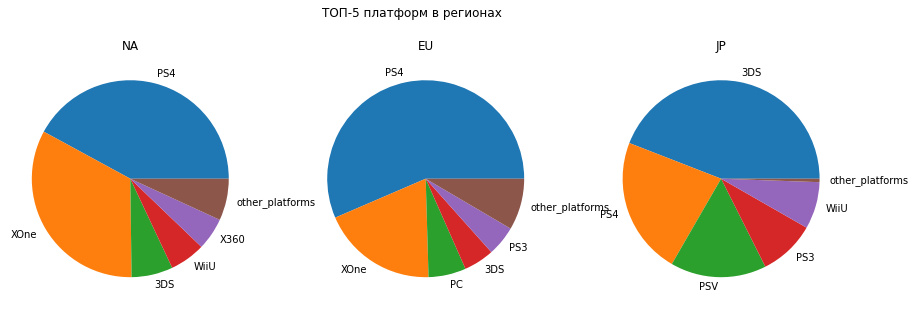

In [56]:
countries = df2.columns[4:7]
display(countries)
# начертим круговую диаграмму для каждого региона
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 платформ в регионах')
for i in range(3): 
    # выберем 5 самых продающих платформ
    df2_i = (df2.groupby('platform')[countries[i]].sum().
             reset_index().
             sort_values(countries[i], ascending = False, ignore_index = True).
             head())
    # занесем все остальные продажи в Other_platforms
    df2_i = df2_i.append({'platform': 'other_platforms', countries[i]: df2[countries[i]].sum() - df2_i[countries[i]].sum()}, ignore_index = True)
    axs[i].pie(df2_i[countries[i]], labels = df2_i['platform'])
    #Зададим название региона
    axs[i].set_title(df2_i.columns[1].split('_')[0].upper())
plt.show()    

In [57]:
#создадим сводую таблицу по жанру в региоре и отсортируем ее
#create a summary table by genre in the region and sort it
user_na = df2.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').sort_values('na_sales', ascending=False)
user_na

,na_sales
genre,
Shooter,48.18
Action,33.68
Sports,26.31
Role-Playing,19.82
Misc,5.58
Fighting,5.54
Adventure,3.84
Platform,3.78
Racing,2.82


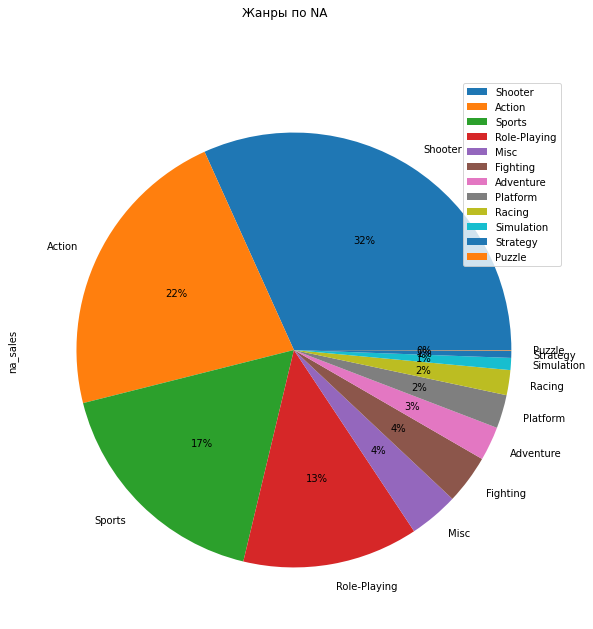

In [58]:
#Построим круговую диаграмму и определим топ-5 жанров по региону за период
#Let's build a pie chart and determine the top 5 genres by region for the period
user_na.plot(kind = 'pie', autopct='%1.0f%%', subplots=True, title='Жанры по NA', figsize=(10,10));

In [59]:
user_na_5 = user_na[user_na['na_sales'] > 5.56]
user_na_5

,na_sales
genre,
Shooter,48.18
Action,33.68
Sports,26.31
Role-Playing,19.82
Misc,5.58


Самый популярный жанр - Action, составляющий 29%

Немного отстает Shooter - 25%

Самый непопулярный - Puzzle - меньше 1%

Топ-5 жанров:
* Shooter	
* Action
* Sports
* Role-Playing
* Misc
___
The most popular genre is Action, which makes up 29%

Shooter - 25 is a little behind%

The most unpopular - Puzzle - less than 1%

Top 5 genres:
* Shooter	
* Action
* Sports
* Role-Playing
* Misc

In [60]:
#Определим Топ-5 платформ по региону аналогичным порядком
user_na_p = df2.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values('na_sales', ascending=False)
user_na_p

,na_sales
platform,
PS4,63.86
XOne,50.30
3DS,10.31
WiiU,8.86
X360,8.05
PS3,5.66
PC,3.72
PSV,0.54
Wii,0.49


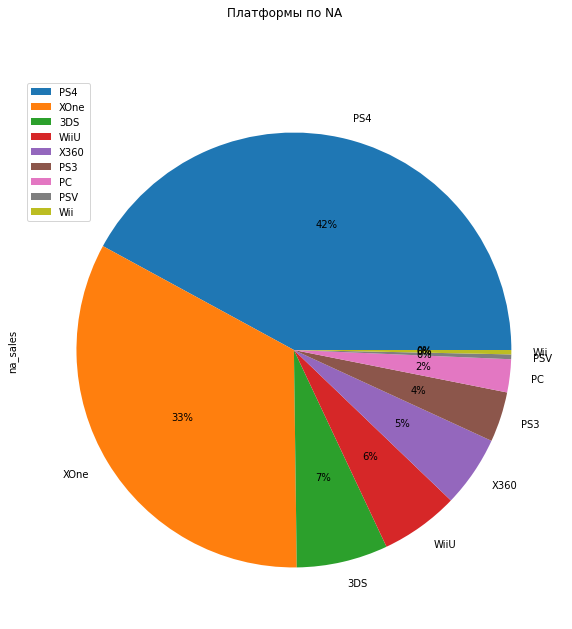

In [61]:
user_na_p.plot(kind = 'pie', autopct='%1.0f%%', subplots=True, title='Платформы по NA', figsize=(10,10));

In [62]:
user_na_p_5 = user_na_p[user_na_p['na_sales'] > 6]
user_na_p_5

,na_sales
platform,
PS4,63.86
XOne,50.30
3DS,10.31
WiiU,8.86
X360,8.05


Так, среди топ-5 платформ присутствуют двое лидеров, выявленные нами в целом за период суммарно по всем регионам.

Пользователи больше пользуются платформой PS4 среди всех платформ в данном регионе, что составляет - 42%

Место в рейтинге   | Платформа  | Доля %|
-------------------|------------|-------|
1 место            | PS4        | 42    | 
2 место            | XOne       | 33    | 
3 место            | X360       | 7    | 
4 место            | PS3        | 6    | 
5 место            | 3DS        | 5    | 

___

So, among the top 5 platforms there are two leaders identified by us as a whole for the period in total across all regions.

Users use the PS4 - 42 platform more%

# Регион EU / Region EU

In [63]:
#создадим сводую таблицу по жанру в регионе за период 2013-2016  и отсортируем ее
#create a summary table for period 2013-2016 by genre in the region and sort it
user_eu = df2.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').sort_values('eu_sales', ascending=False)
user_eu

,eu_sales
genre,
Shooter,40.28
Action,34.82
Sports,27.82
Role-Playing,17.21
Racing,6.52
Adventure,4.67
Misc,4.26
Simulation,3.74
Fighting,3.72


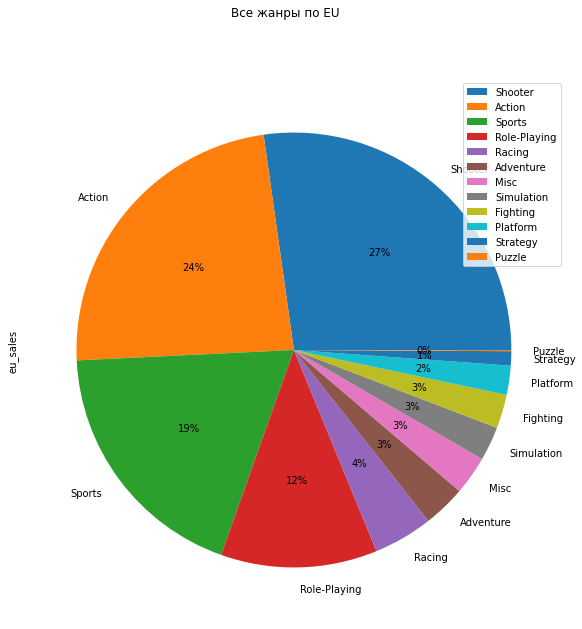

In [64]:
#Построим круговую диаграмму и определим топ-5 жанров по региону за период
#Let's build a pie chart and determine the top 5 genres by region for the period
user_eu.plot(kind = 'pie', autopct='%1.0f%%', subplots=True, title='Все жанры по EU', figsize=(10,10));

In [65]:
user_eu_5 = user_eu[user_eu['eu_sales'] > 5]
user_eu_5

,eu_sales
genre,
Shooter,40.28
Action,34.82
Sports,27.82
Role-Playing,17.21
Racing,6.52


In [66]:
#user_eu_5.plot(kind='pie', autopct='%1.0f%%', subplots=True, title='Топ-5 ף по EU', figsize=(10,10));

Также самый популярный жанр - Shooter, составляющий 27%

Также немного отстает Action - 24%

Также самый непопулярный - Puzzle - меньше 1%

Misc не вошел в петерку лучшухБ его немного обошел Racing

Топ-5 жанров:
* Shooter
* Action	
* Sports
* Role-Playing
* Racing
___
The most popular genre is Action, which makes up 27%

Shooter - 24 is a little behind%

The most unpopular - Puzzle - less than 1%

Misc did not enter the top five, it was slightly bypassed by Racing

Top 5 genres:
* Shooter
* Action
* Sports
* Role-Playing
* Racing

In [67]:
user_eu_p = df2.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False)
user_eu_p

,eu_sales
platform,
PS4,83.54
XOne,28.10
PC,9.10
3DS,7.39
PS3,7.30
WiiU,6.49
X360,4.21
PSV,1.08
Wii,0.73


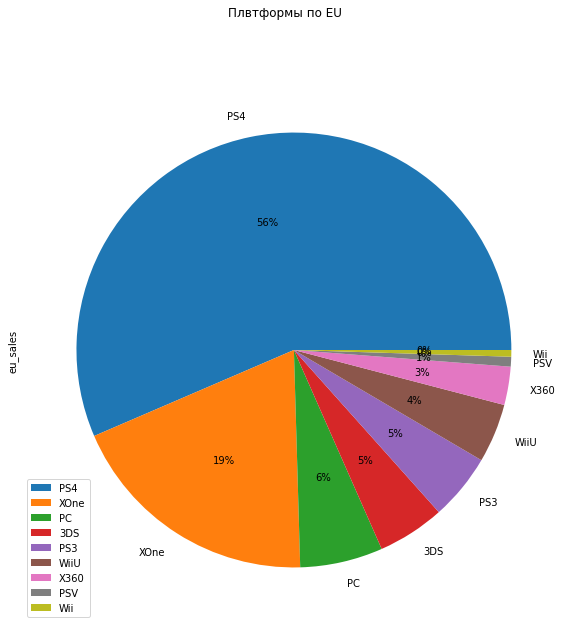

In [68]:
user_eu_p.plot(kind='pie', autopct='%1.0f%%', subplots=True, title='Плвтформы по EU', figsize=(10,10));

In [69]:
user_eu_p_5 = user_eu_p[user_eu_p['eu_sales'] > 7]
user_eu_p_5

,eu_sales
platform,
PS4,83.54
XOne,28.10
PC,9.10
3DS,7.39
PS3,7.30


Так, среди топ-5 платформ присутствуют уже трое лидеров, выявленные нами в целом за период суммарно по всем регионам.

Пользователи также как и по предыдущему региону больше пользуются платформой PS4 среди всех платформ в данном регионе, что составляет 56%

Место в рейтинге   | Платформа  | Доля %|
-------------------|------------|-------|
1 место            | PS4        | 56   | 
2 место            | XOne       | 19    | 
3 место            | PC         | 6    | 
4 место            | 3DS        | 5    | 
5 место            | PS3        | 5| 

___

So, among the top 5 platforms there are already three leaders identified by us in general for the period in total across all regions.

Users, as well as in the previous region, use the PS4 platform more among all platforms in this region, which is 56%


# Регион JP / Region JP

In [70]:
#создадим сводую таблицу по жанру в регионе за период 2013-2016  и отсортируем ее
#create a summary table for period 2013-2016 by genre in the region and sort it
user_jp = df2.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False)
user_jp

,jp_sales
genre,
Action,23.05
Role-Playing,13.41
Shooter,3.79
Misc,3.19
Adventure,2.22
Simulation,1.93
Sports,1.65
Fighting,1.54
Platform,1.42


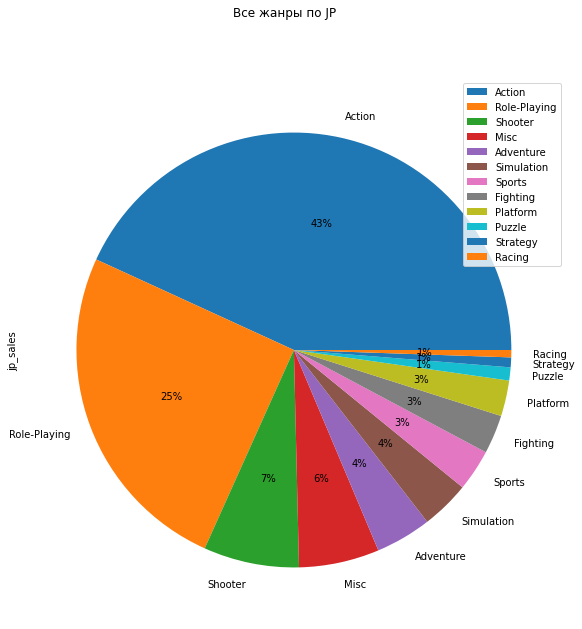

In [96]:
#Построим круговую диаграмму и определим топ-5 жанров по региону за период
#Let's build a pie chart and determine the top 5 genres by region for the period
user_jp.plot(kind = 'pie', autopct='%1.0f%%', subplots=True, title='Все жанры по JP', figsize=(10,10));

In [72]:
user_jp_5 = user_jp[user_jp['jp_sales'] > 2]
user_jp_5

,jp_sales
genre,
Action,23.05
Role-Playing,13.41
Shooter,3.79
Misc,3.19
Adventure,2.22


Пользовательские предпочтения с жанрами в Японском регионе немного иные.

Жанр Action сместился на первое место, а на втором - Role-Playing.

Выходит, что в других регионах менее интересно - в Японии наоборот - востребовано.

Место в рейтинге   | Жанр.      | Доля %|
-------------------|------------|-------|
1 место            | Action     | 43    | 
2 место            | Role-Playing | 25    | 
3 место            | Shooter    | 7    | 
4 место            | Misc       | 6    | 
5 место            | Adventure  | 4    | 

____
User preferences with genres in the Japanese region are slightly different.

The Action genre has shifted to the first place, and Role-Playing is on the second.

It turns out that in other regions it is less interesting - in Japan, on the contrary, it is in demand.

In [73]:
#создадим сводую таблицу по платформам в регионе за период 2015-2016  и отсортируем ее
#create a summary table for period 2013-2016 by platforms in the region and sort it
user_jp_p = df2.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False)
user_jp_p

,jp_sales
platform,
3DS,23.55
PS4,12.05
PSV,8.41
PS3,4.97
WiiU,4.12
XOne,0.18
PSP,0.12
PC,0.00
Wii,0.00


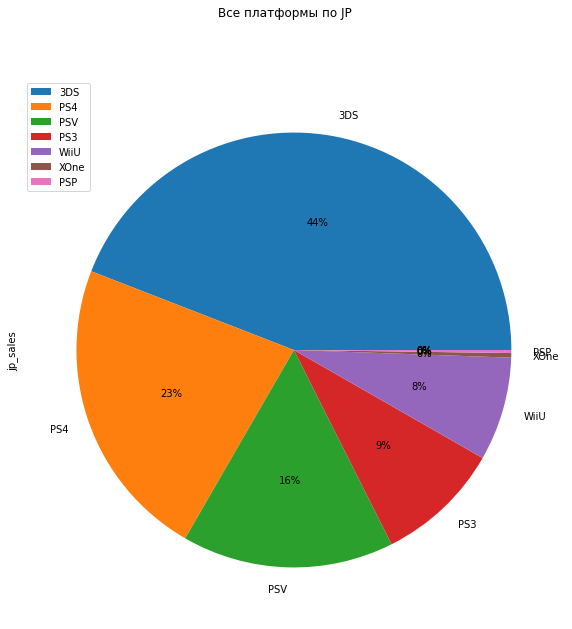

In [74]:
#Построим круговую диаграмму и определим топ-5 жанров по региону за период
#Let's build a pie chart and determine the top 5 genres by region for the period
user_jp_p.plot(kind = 'pie', autopct='%1.0f%%', subplots=True, title='Все платформы по JP', figsize=(10,10));

Пользовательские предпочтения по игровым платформам, как и с жанрами в Японском регионе иные не только по структуре, но и по форме.

Можно сказать, что из всех платформ пользователь предпочитают и так практически 5 основных, одна из которых (3DS) занимает почти половину от всех продаж.

Место в рейтинге   | Жанр.      | Доля %|
-------------------|------------|-------|
1 место            | 3DS        | 44    | 
2 место            | PS4        | 23    | 
3 место            | PSV        | 16    | 
4 место            | PS3        | 9    | 
5 место            | WiiU       | 8    | 

___
User preferences for gaming platforms, as with genres in the Japanese region, are different not only in structure, but also in form.

We can say that of all the platforms, the user prefers almost 5 main ones, one of which (3DS) takes up almost half of all sales.

# Регион Other / Region Other

In [75]:
#создадим сводую таблицу по жанрам в регионе за период 2013-2016  и отсортируем ее
#create a summary table for period 2013-2016 by genre in the region and sort it
user_other = df2.pivot_table(index='genre', values='other_sales', aggfunc='sum').sort_values('other_sales', ascending=False)
user_other

,other_sales
genre,
Shooter,13.48
Action,10.58
Sports,8.55
Role-Playing,5.38
Fighting,1.57
Adventure,1.25
Racing,1.23
Misc,1.14
Platform,0.88


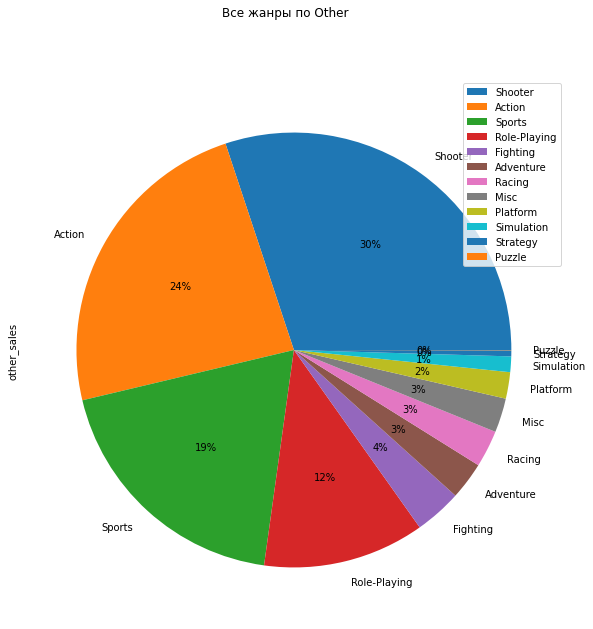

In [76]:
#Построим круговую диаграмму и определим топ-5 жанров по региону за период
#Let's build a pie chart and determine the top 5 genres by region for the period
user_other.plot(kind = 'pie', autopct='%1.0f%%', subplots=True, title='Все жанры по Other', figsize=(10,10));

In [77]:
user_other_5 = user_other[user_other['other_sales'] > 1.3]
user_other_5

,other_sales
genre,
Shooter,13.48
Action,10.58
Sports,8.55
Role-Playing,5.38
Fighting,1.57


Пользовательские жанровые предпочтения практически идентичны с NA кроме 5-й позиции.

Место в рейтинге   | Жанр.      | Доля %|
-------------------|------------|-------|
1 место            | Shooter    | 30    | 
2 место            | Action     | 24    | 
3 место            | Sports     | 19   | 
4 место            | Role-Playing  | 12    | 
5 место            | Fighting      | 4    | 

____
User genre preferences are almost identical with NA except for the 5th position.

In [78]:
#создадим сводую таблицу по платформам в регионе за период 2015-2016  и отсортируем ее
#create a summary table for period 2013-2016 by platforms in the region and sort it
user_other_p = df2.pivot_table(index='platform', values='other_sales', aggfunc='sum').sort_values('other_sales', ascending=False)
user_other_p

,other_sales
platform,
PS4,28.70
XOne,7.71
PS3,2.49
3DS,1.67
WiiU,1.48
X360,1.22
PC,0.95
PSV,0.47
Wii,0.10


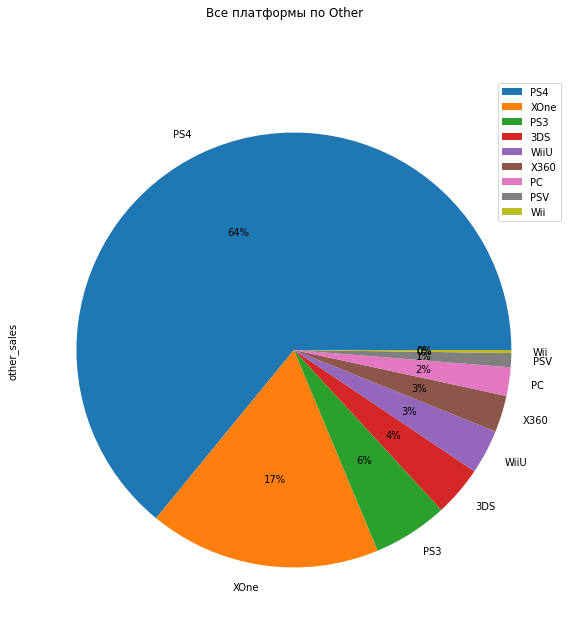

In [79]:
#Построим круговую диаграмму и определим топ-5 жанров по региону за период
#Let's build a pie chart and determine the top 5 genres by region for the period
user_other_p.plot(kind = 'pie', autopct='%1.0f%%', subplots=True, title='Все платформы по Other', figsize=(10,10));

In [80]:
user_other_p_5 = user_other_p[user_other_p['other_sales'] > 1.3]
user_other_p_5

,other_sales
platform,
PS4,28.70
XOne,7.71
PS3,2.49
3DS,1.67
WiiU,1.48


Так, среди топ-5 платформ присутствуют все лидеры, выявленные нами в целом за период суммарно по всем регионам.

Пользователи больше пользуются платформой PS4 среди всех платформ в данном регионе, что составляет - 64%

Место в рейтинге   | Платформа  | Доля %|
-------------------|------------|-------|
1 место            | PS4        | 64    | 
2 место            | XOne       | 17    | 
3 место            | PS3        | 6    | 
4 место            | 3DS        | 4    | 
5 место            | WiiU       | 3     | 

___

So, among the top 5 platforms there are all the leaders identified by us as a whole for the period in total for all regions.

Users use the PS4 platform more among all platforms in this region, which is - 64%


# Влияет ли рейтинг ESRB на продажи в отдельном регионе?
___
# Does the ESRB rating affect sales in a particular region?

[<AxesSubplot:ylabel='na_sales'>]
[<AxesSubplot:ylabel='eu_sales'>]
[<AxesSubplot:ylabel='jp_sales'>]
[<AxesSubplot:ylabel='other_sales'>]


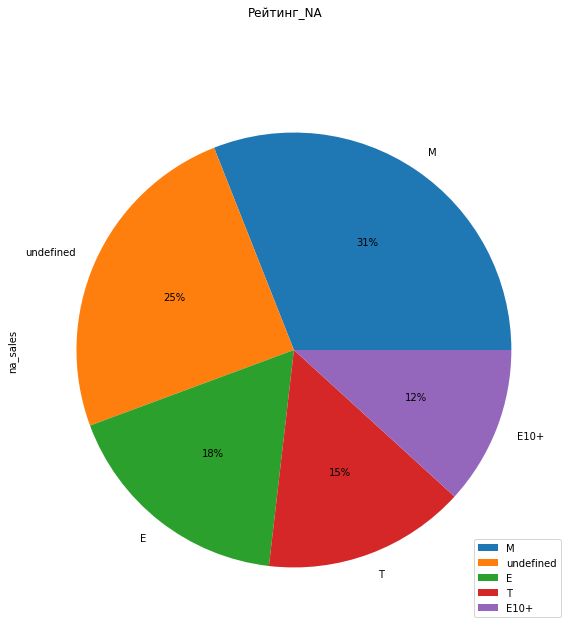

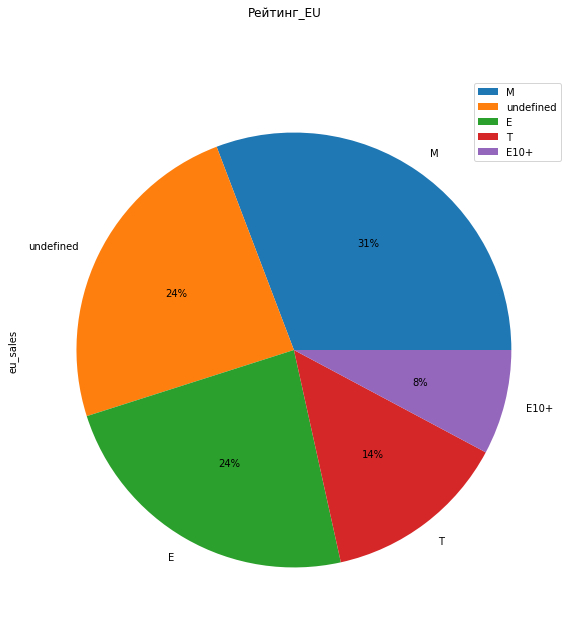

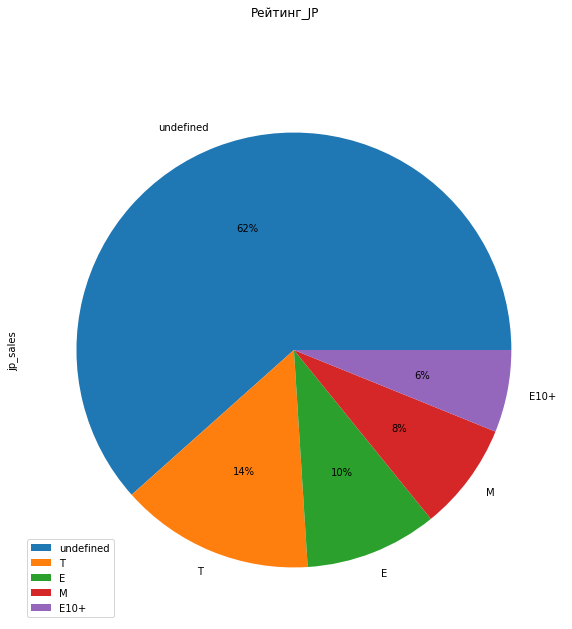

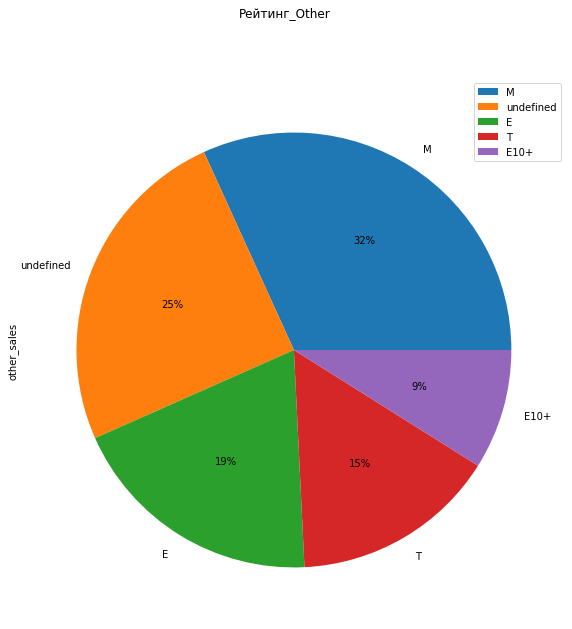

In [81]:
#создадим сводую таблицу по рейтингу в регионе за период 2013-2016  и отсортируем ее
#create a summary table for period 2013-2016 by ranking in the region and sort it
rating_na = df2.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False)
rating_eu = df2.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False)
rating_jp = df2.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False)
rating_other = df2.pivot_table(index='rating', values='other_sales', aggfunc='sum').sort_values('other_sales', ascending=False)

print(rating_na.plot(kind = 'pie', autopct='%1.0f%%', subplots=True, title='Рейтинг_NA', figsize=(10,10)))
print(rating_eu.plot(kind = 'pie', autopct='%1.0f%%', subplots=True, title='Рейтинг_EU', figsize=(10,10)))
print(rating_jp.plot(kind = 'pie', autopct='%1.0f%%', subplots=True, title='Рейтинг_JP', figsize=(10,10)))
print(rating_other.plot(kind = 'pie', autopct='%1.0f%%', subplots=True, title='Рейтинг_Other', figsize=(10,10)))

# Вывод / Conclusion
По итогу исследовательского анализа за период с 2015-2016 года можно сделать вывод, что во всех регионах кроме Японии, а именно в Северной Америке, Европе и других странах самый популярный рейтинг - М ("для лиц старше 18 лет).

Что касается Японии, то тут наиболее популярен рейтинг с неопределенными жанрами, а вот рейтинг М сместился на 4 место.

___
According to the results of the research analysis for the period from 2013-2016, it can be concluded that in all regions except Japan, namely in North America, Europe and other countries, the most popular rating is M ("for persons over 18 years old).

As for Japan, the rating with uncertain genres is the most popular here, but the M rating has shifted to 4th place.

Место в рейтинге   | Рейтинг  | Доля % NA|  
-------------------|----------|----------|
1 место            | М        | 31       |       
2 место            | undefined| 25       |      
3 место            | E        | 18       |   
4 место            | E10+     | 15       |  
5 место            | T        | 12       |  

Место в рейтинге   | Рейтинг  | Доля % EU|  
-------------------|----------|----------|
1 место            | М        | 31       |       
2 место            | E        | 24       |      
3 место            | undefined| 24       |   
4 место            | E10+     | 14       |  
5 место            | T        | 8       | 

Место в рейтинге   | Рейтинг  | Доля % Other|  
-------------------|----------|----------|
1 место            | М        | 32       |       
2 место            | undefined| 25       |      
3 место            | E        | 19       |   
4 место            | T        | 15       |  
5 место            | E10+     | 9       |

Место в рейтинге   | Рейтинг  | Доля % JP|  
-------------------|----------|----------|
1 место            | undefined| 62       |       
2 место            | T        | 14       |      
3 место            | E        | 10       |   
4 место            | M        | 8       |  
5 место            | E10+     | 6       |


Самые популярные жанры и платформы в регионах / The most popular genres and platforms in the regions

Страна    | Жанр       | Платформа|  
----------|------------|----------|
NA        | Shooter     | PS4      |       
EU        | Shooter     | PS4      |      
JP        | Action      | 3DS     |   
Other     | Shooter     | PS4      |  


Таким образом, учитывая что большая часть игр с неопределенным рейтингом крайне популярна в Японии, то можно предположить, что интерес на такие игры постепенно переходит и на другие регионы. Но так как в Европе игры с таким рейтингом на 3 месте, это вероятно говорит о каких-либо доболнительных требованиях к стандартам или некоторым ограничениям, сдерживающим их активное распространение.

Что касатся жанров и платформ, то если Северная Америка, Европа и Другие страны имеют одинаковые предпочтения (жанр - Shooter и платформа - PS4), то Япония в этом плане отличается (жанр - Action, платформа - 3DS).
___
Thus, given that most of the games with an uncertain rating are extremely popular in Japan, it can be assumed that interest in such games is gradually shifting to other regions. But since games with such a rating are in 3rd place in Europe, this probably indicates any additional requirements for standards or some restrictions that restrain their active distribution.

As for genres and platforms, if North America, Europe and other countries have the same preferences (genre - Shooter and platform - PS4), then Japan is different in this regard (genre - Action, platform - 3DS).

# Проверка гипотез <a id='intro_4'></a>
# Hypothesis testing

_**Первая гипотеза**_

**Гипотеза Н0**: Средние пользовательские рейтинги платформ Xbox One (XOne) и PC одинаковые;

Формируем альтернативную гипотезу исходя из противоположености:

**Гипотеза альтернативная Н1**: Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые;


_**Вторая гипотеза**_

Гипотеза 0: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Нулевая гипотеза Н0**: Средние пользовательские рейтинги жанров Action и Sports одинаковые.

Формируем альтернативную гипотезу исходя из противоположености:

**Гипотеза альтернативная Н1**: Средние пользовательские рейтинги жанров Action и Sports разные.
___
_**The first hypothesis**_

**Hypothesis H0**: The average user ratings of the Xbox One (XOne) and PC platforms are the same;

We form an alternative hypothesis based on the opposite:

**Alternative hypothesis H1**: The average user ratings of the Xbox One and PC platforms are not the same;


_**The second hypothesis**_

Hypothesis 0: Average user ratings of the genres Action (English "action", action games) and Sports (English "sports competitions") are different.

**Null hypothesis H0**: Average user ratings of Action and Sports genres are the same.

We form an alternative hypothesis based on the opposite:

**Alternative hypothesis H1**: Average user ratings of Action and Sports genres are different.

In [82]:
selection_XOne = df2[df2['platform'] == 'XOne']
selection_XOne

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_game_sum
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,-1.0,undefined,7.39
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
342,Star Wars Battlefront (2015),XOne,2015,Shooter,2.04,1.28,0.02,0.32,NaN,-1.0,undefined,3.66
413,Gears of War: Ultimate Edition,XOne,2015,Shooter,2.61,0.33,0.00,0.34,82.0,7.5,M,3.28
...,...,...,...,...,...,...,...,...,...,...,...,...
16630,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63.0,8.2,E,0.01
16643,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,NaN,6.6,E,0.01
16645,ZombiU,XOne,2016,Action,0.00,0.01,0.00,0.00,NaN,-1.0,undefined,0.01
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.7,undefined,0.01


In [83]:
selection_PC = df2[df2['platform'] == 'PC']
selection_PC

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_game_sum
1530,Fallout 4,PC,2015,Role-Playing,0.51,0.67,0.0,0.10,84.0,5.4,M,1.28
1730,Grand Theft Auto V,PC,2015,Action,0.39,0.69,0.0,0.09,96.0,7.9,M,1.17
2851,The Witcher 3: Wild Hunt,PC,2015,Role-Playing,0.21,0.46,0.0,0.05,93.0,9.3,M,0.72
3123,Farming Simulator 17,PC,2016,Simulation,0.03,0.58,0.0,0.04,64.0,8.0,E,0.65
3666,Star Wars Battlefront (2015),PC,2015,Shooter,0.13,0.38,0.0,0.04,NaN,-1.0,undefined,0.55
...,...,...,...,...,...,...,...,...,...,...,...,...
16456,Fallout Anthology,PC,2015,Action,0.00,0.01,0.0,0.00,NaN,8.3,undefined,0.01
16463,TrackMania Turbo,PC,2016,Action,0.00,0.01,0.0,0.00,79.0,6.8,E,0.01
16509,Ride 2,PC,2016,Racing,0.00,0.01,0.0,0.00,78.0,7.9,E,0.01
16518,Rugby World Cup 2015,PC,2015,Sports,0.00,0.01,0.0,0.00,NaN,1.4,E,0.01


Пороговое значение альфа в размере 0,05 - золотой стандарт, но поскольку в анализируемом периоде с 2013 по 2016 год выборка по платформе XOne - 247 строк (платформа Xbox One вообще отсутствует в первоначальном датафрейме), а по платформе PC - 189 строк, то определим пороговое значение в размере 0,01

если p-value окажется меньше него - отвергаем нулевую гипотезу
___
The threshold value of alpha in the amount of 0.05 is the gold standard, but since in the analyzed period from 2013 to 2016, the sample for the XOne platform is 247 rows (the Xbox One platform is not in the original dataframe at all), and for the PC platform - 189 rows, we will determine the threshold value in the amount of 0.01

if the p-value turns out to be less than it, we reject the null hypothesis

In [84]:
df2['user_score'].unique()

array([-1. ,  4.3,  5. ,  6.5,  7.9,  8.1,  6.4,  3.4,  8.5,  6.2,  8.4,
        9.2,  7.6,  6.7,  7. ,  8.2,  6.8,  7.5,  4.4,  5.9,  8.7,  6.9,
        7.7,  3.2,  5.5,  8.6,  3.1,  6.1,  9. ,  6.3,  7.3,  6. ,  5.1,
        4.9,  6.6,  4.5,  8.8,  2.9,  8. ,  7.8,  5.4,  7.4,  5.2,  5.6,
        7.1,  8.9,  4.6,  3.3,  9.3,  7.2,  5.7,  8.3,  3.7,  5.3,  5.8,
        1.7,  4.2,  3.8,  4.7,  4.1,  4. ,  1.5,  0.7,  4.8,  3. ,  2.5,
        2. ,  2.1,  0.2,  2.8,  1.9,  3.5,  3.6,  1.6,  2.4,  2.3,  1.4])

In [85]:
#исключаем значения, которыми заменяли пропуски (-1)
df2 = df2[df2['user_score'] != -1]
df2['user_score'].unique()

array([4.3, 5. , 6.5, 7.9, 8.1, 6.4, 3.4, 8.5, 6.2, 8.4, 9.2, 7.6, 6.7,
       7. , 8.2, 6.8, 7.5, 4.4, 5.9, 8.7, 6.9, 7.7, 3.2, 5.5, 8.6, 3.1,
       6.1, 9. , 6.3, 7.3, 6. , 5.1, 4.9, 6.6, 4.5, 8.8, 2.9, 8. , 7.8,
       5.4, 7.4, 5.2, 5.6, 7.1, 8.9, 4.6, 3.3, 9.3, 7.2, 5.7, 8.3, 3.7,
       5.3, 5.8, 1.7, 4.2, 3.8, 4.7, 4.1, 4. , 1.5, 0.7, 4.8, 3. , 2.5,
       2. , 2.1, 0.2, 2.8, 1.9, 3.5, 3.6, 1.6, 2.4, 2.3, 1.4])

In [86]:
#именуем выборки платформ, отобранные с учетом оценок пользователей
selection_XOne_user = selection_XOne['user_score']
selection_PC_user = selection_PC['user_score']
alpha = .01 # критический уровень статистической значимости
results = st.ttest_ind(selection_XOne_user, selection_PC_user)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.3258876032093114
Не получилось отвергнуть нулевую гипотезу


In [87]:
selection_action = df2[df2['genre'] == 'Action']
selection_action

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_game_sum
231,Uncharted: The Nathan Drake Collection,PS4,2015,Action,2.07,1.71,0.08,0.76,86.0,8.1,T,4.62
305,Batman: Arkham Knight,PS4,2015,Action,1.53,1.69,0.10,0.64,87.0,7.6,M,3.96
390,Metal Gear Solid V: The Phantom Pain,PS4,2015,Action,1.09,1.36,0.49,0.48,93.0,8.2,M,3.42
396,Assassin's Creed Syndicate,PS4,2015,Action,0.81,1.99,0.07,0.52,76.0,6.8,M,3.39
623,Bloodborne,PS4,2015,Action,1.03,0.81,0.26,0.38,92.0,8.6,M,2.48
...,...,...,...,...,...,...,...,...,...,...,...,...
16533,Rugby League Live 3,XOne,2015,Action,0.00,0.01,0.00,0.00,NaN,7.1,E,0.01
16544,Assassin's Creed Chronicles,XOne,2016,Action,0.00,0.01,0.00,0.00,NaN,6.8,T,0.01
16597,Saints Row: Gat out of Hell,XOne,2015,Action,0.00,0.01,0.00,0.00,65.0,6.0,M,0.01
16652,Fast Racing Neo,WiiU,2016,Action,0.00,0.01,0.00,0.00,81.0,8.5,E,0.01


In [88]:
selection_sport = df2[df2['genre'] == 'Sports']
selection_sport

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_game_sum
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
314,NBA 2K16,PS4,2015,Sports,2.49,0.66,0.03,0.69,87.0,6.7,E10+,3.87
417,FIFA 16,XOne,2015,Sports,0.89,2.12,0.00,0.24,84.0,4.4,E,3.25
420,Madden NFL 16,PS4,2015,Sports,2.34,0.30,0.00,0.60,83.0,5.9,E,3.24
...,...,...,...,...,...,...,...,...,...,...,...,...
16015,Mark McMorris Infinite Air,XOne,2016,Sports,0.01,0.00,0.00,0.00,NaN,7.1,T,0.01
16120,NBA 2K17,PC,2016,Sports,0.00,0.01,0.00,0.00,90.0,6.3,E,0.01
16142,MLB 15: The Show,PSV,2015,Sports,0.01,0.00,0.00,0.00,NaN,8.8,E,0.01
16518,Rugby World Cup 2015,PC,2015,Sports,0.00,0.01,0.00,0.00,NaN,1.4,E,0.01


Выборки разного размера и есть сомнения, что дисперсии у совокупностей одинаковые, поэтому укажем параметр equal_var как False, и тест посчитает дисперсии выборок по отдельности.
___
The samples are of different sizes and there are doubts that the variances of the aggregates are the same, so we specify the equal_var parameter as False, and the test will calculate the variances of the samples separately.

In [89]:
df2.isna().sum()

name                 0
platform             0
year_of_release      0
genre                0
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score       111
user_score           0
rating               0
sales_game_sum       0
dtype: int64

In [90]:
#именуем выборки жанров, отобранные с учетом оценок пользователей
selection_action_0 = selection_action['user_score']
selection_sport_1 = selection_sport['user_score']
alpha = .01 # критический уровень статистической значимости, поскольку выборка маленькая, то и КУСЗ также 0,01и
results = st.ttest_ind(selection_action_0, selection_sport_1, equal_var = False)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 5.97163549920592e-10
Отвергаем нулевую гипотезу


# Вывод
В связи с тем, что нам необходимо было сравнивать средние двух совокупностей между собой, то был выбран метод ind

Учитывая, что выборки были не очень большие и они помещаются в оперативную память компьютера, то можно было просто рассчитать их средние и сравнить между собой без всяких статистических тестов. Однако на практике часто данных слишком много и выводы нужно делать по выборкам. Тут уже без корректной статистической методологии не обойтись.

Так было определено, что:
- не получилось отвергнуть нулевую гипотезу и средние пользовательские рейтинги платформ Xbox One (XOne) и PC **одинаковые**

- подтвердилась **альтернативная** гипотеза - средние пользовательские рейтинги жанров **Action и Sports разные**
___
# Conclusion
Due to the fact that we needed to compare the averages of the two aggregates with each other, the ind method was chosen, Given that the samples were not very large and they fit into the computer's RAM, then it was possible to simply calculate their averages and compare them with each other without any statistical tests. However, in practice, there is often too much data and conclusions need to be drawn from samples. There is no way to do without a correct statistical methodology.

So it was determined that:

- it was not possible to reject the null hypothesis and the average user ratings of the Xbox One (XOne) and PC platforms **are the same**

- confirmed **alternative** hypothesis - average user ratings of genres **Action and Sports are different**

# ОБЩИЙ ВЫВОД 💡 <a id='intro_5'></a>

Так с 2009 года наблюдается спад реализаций игр. С 2009 по 2013 год продажи сократились более чем в 2 раза. 

Как отмечалось выше, для прогноза продаж на 2017 год за ретроспективу был взят 2015 год  и данные за 2016 год, которые могут быть не полные.


Наблюдается "пакетное" угасание активности платформ вплоть до нуля на протяжении нескольких лет. Видимо это связано со снижением интереса ЦА на фоне переключения интересов на какие-либо другие технологичные продукты, моды и т.п.

Тройка лидеров по популярности  - Action, Sports, Misc. Если они настолько популярны - значит они самые продаваемые.

Наблюдаем платформы которые имеют нулевые значения, а также выбросы и выбивающиеся значения. Учитывая, что выбивающими значениями могут быть редкие продажи в больших объемах (например больше 80 млн.), то не стоит как-то обрабатывать эти данные, тем боллее это статистика за весь период.

Медианное значение у платформы XOne немного больше, чем у PS4, что говорит о стабильном уровне продаж за исследуемый период.
В любом случае, наиболее привлекательная платворма - PS4 так не смотря на меньший уровень "стабольности" она имеет больший объем продаж, а также плотно размещенные частые выбросы в пределах 1,5% от 3-го квантиля. 

Чем выше оценка пользователей - от 6, тем мы наблюдаем наиболее частые о более плотно располагающиеся точки - продажи.
Посмотрим на взаимосвязь оценок критиков.

Аналогично оценкам пользователей - чем выше оценка критиков - тем выше объемы продаж.

При этом объем продаж больше чувствителен к оценкам критиков, чем к оценкам пользователей, поскольку большая скученность точек-продаж наблюдается после 70, в то время как у пользователей - после 6.
Если оценка критиков меньше 60 - то продажи совсем незначительны.

Корреляция объема продаж в зависимости от оценок пользователей - слабоотрицательная говорит о том, что при увеличении на единицу оценки пользователя - продажа уменьшается, но незначительно.

Корреляция объема продаж в зависимости от оценок критиков - слабоположительная говорит о том, что при увеличении на единицу оценки критика - продажа увеличивается, но незначительно.
В целом по графикам мы наблюдали увеличение продаж в зависимости от оцено критиков.

Жанры выделяются с высокими и низкими продажами.
Топ-5 жанров за период 2015-2016гг.:
* Shooter
* Action
* Sports
* Role-Playing
* Misc

По итогу исследовательского анализа за период с 2013-2016 года можно сделать вывод, что во всех регионах кроме Японии, а именно в Северной Америке, Европе и других странах самый популярный рейтинг - М ("для лиц старше 18 лет).

As for Japan, the rating with uncertain genres is the most popular here, but the M rating has shifted to 4th place.

Место в рейтинге   | Рейтинг  | Доля % NA|  
-------------------|----------|----------|
1 место            | М        | 31       |       
2 место            | undefined| 25       |      
3 место            | E        | 18       |   
4 место            | E10+     | 15       |  
5 место            | T        | 12       |  

Место в рейтинге   | Рейтинг  | Доля % EU|  
-------------------|----------|----------|
1 место            | М        | 31       |       
2 место            | E        | 24       |      
3 место            | undefined| 24       |   
4 место            | E10+     | 14       |  
5 место            | T        | 8       | 

Место в рейтинге   | Рейтинг  | Доля % Other|  
-------------------|----------|----------|
1 место            | М        | 32       |       
2 место            | undefined| 25       |      
3 место            | E        | 19       |   
4 место            | T        | 15       |  
5 место            | E10+     | 9       |

Место в рейтинге   | Рейтинг  | Доля % JP|  
-------------------|----------|----------|
1 место            | undefined| 62       |       
2 место            | T        | 14       |      
3 место            | E        | 10       |   
4 место            | M        | 8       |  
5 место            | E10+     | 6       |


Самые популярные жанры и платформы в регионах / The most popular genres and platforms in the regions

Страна    | Жанр       | Платформа|  
----------|------------|----------|
NA        | Shooter     | PS4      |       
EU        | Shooter     | PS4      |      
JP        | Action      | 3DS     |   
Other     | Shooter     | PS4      |  


Таким образом, учитывая что большая часть игр с неопределенным рейтингом крайне популярна в Японии, то можно предположить, что интерес на такие игры постепенно переходит и на другие регионы. Но так как в Европе игры с таким рейтингом на 3 месте, это вероятно говорит о каких-либо доболнительных требованиях к стандартам или некоторым ограничениям, сдерживающим их активное распространение.


- не получилось отвергнуть нулевую гипотезу и средние пользовательские рейтинги платформ Xbox One (XOne) и PC **одинаковые**

- подтвердилась альтернативная гипотеза - средние пользовательские рейтинги жанров **Action и Sports разные**
___
# GENERAL CONCLUSION 💡


So since 2009, there has been a decline in game implementations. From 2009 to 2013, sales decreased by more than 2 times. 

As noted above, for the sales forecast for 2017, it is better to take 2015-2016 years in retrospect, given that the data for 2016 may not be complete.

There has been a "batch" decline in the activity of platforms down to zero for several years. Apparently, this is due to a decrease in the interest of the target audience against the background of switching interests to any other technological products, mods, etc.

The top three in popularity are Action, Sports, Misc. If they are so popular, then they are the best-selling.

We observe platforms that have zero values, as well as outliers and outliers. Given that the knockout values may be rare sales in large volumes (for example, more than 80 million), then it is not necessary to somehow process this data, the more it is statistics for the entire period.

Median value of the XOne platform is slightly higher than that of the PS4, which indicates a stable level of sales for the period under study.
In any case, the most attractive platform is the PS4, so despite the lower level of "stability", it has a larger sales volume, as well as densely placed frequent emissions within 1.5% of the 3rd quantile.

The higher the user rating - from 6, the more frequent and more densely located points of sale we observe.
Let's look at the relationship of critics' ratings.

Similarly to user ratings, the higher the critics' rating, the higher the sales volumes.

At the same time, the volume of sales is more sensitive to critics' estimates than to user estimates, since a large crowding of points of sale is observed after 70, while users have after 6.
If the critics' score is less than 60, then sales are quite insignificant.

The correlation of sales volume depending on user ratings is weakly negative, which means that with an increase in user ratings per unit, sales decrease, but only slightly.

The correlation of sales volume depending on critics' ratings is weakly positive, which means that with an increase in the unit of evaluation, criticism - sales increase, but only slightly.
In general, according to the charts, we observed an increase in sales depending on the critics' ratings.

Genres stand out with high and low sales. Top 5 genres for the period 2015-2016:
* Action
* Shooter
* Sports
* Role-Playing
* Misc

According to the results of the research analysis for the period from 2013-2016, it can be concluded that in all regions except Japan, namely in North America, Europe and other countries, the most popular rating is M ("for persons over 18 years old).

As for Japan, the rating with uncertain genres is the most popular here, but the M rating has shifted to 4th place.

Thus, given that most of the games with an uncertain rating are extremely popular in Japan, it can be assumed that interest in such games is gradually shifting to other regions. But since games with such a rating are in 3rd place in Europe, this probably indicates any additional requirements for standards or some restrictions that restrain their active distribution.

As for genres and platforms, if North America, Europe and other countries have the same preferences (genre - Action and platform - PS4), then Japan is different in this regard (genre - Role-Playing, platform - 3DS).

- it was not possible to reject the null hypothesis and the average user ratings of the Xbox One (XOne) and PC platforms are the same

- an alternative hypothesis has been confirmed - the average user ratings of the Action and Sports genres are the diferent

[В начало тетрадки](#intro)`

[Предобработка данных](#intro_1)

[Исследовательский анализ данных](#intro_2)

[Портрет пользователя каждого региона](#intro_3)

[Проверка гипотез](#intro_4)

[ОБЩИЙ ВЫВОД](intro_5)